# Часть 1. Кросс-валидация (cross validation)

Кросс-валидация (перекрестная проверка) - подход к оцениванию обобщающей способности алгоритмов.
Общие шаги:
 - 1. разделить датасет на две части: тренировочный и тестовый;
 - 2. натренировать модель на тренировочном датасете;
 - 3. проверить качество модели на тестовом датасете;
 - повторить шаги 1-3 требуемое количество раз.

# Валидация на отложенных данных (Hold-Out Validation)

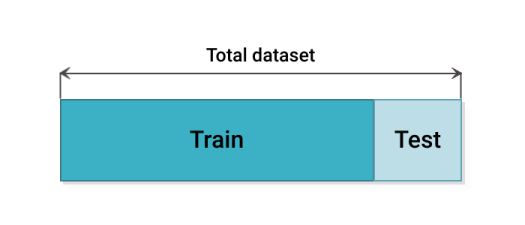

 - разделить датасет на две части: тренировочный и тестовый(часто применяется соотношение 80\20);
 - натренировать модель на тренировочном датасете;
 - проверить качество модели на тестовом датасете;
 Сохранить результат последнего шага в качестве оценки качества работы алгоритма.

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

N_total = 1000
features_num = 10
mu = 0.0
sigma = 1.0
n_classes = 5

X = np.random.normal(mu, sigma, N_total*features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)

In [22]:
print(X[:5], y[:5])

[[ 1.02581133  0.17934621 -0.75313179  0.00927124 -1.02176561 -1.3389966
  -0.00890148 -1.38090412 -0.3925284  -0.22574729]
 [ 1.11753424  0.34942512  0.375972    0.15921653  1.04514201  0.26661234
  -0.02287495  1.35713495  1.72767463 -0.20509005]
 [-0.59667095 -0.51126267  1.88807505 -1.58952673 -0.28124014 -0.35985652
   0.9667982  -1.40891688  1.11385072 -0.48936283]
 [-0.06878709  1.20912196  0.77088318 -0.18757081  0.39009846 -0.36553364
   0.02807633  0.3054911  -1.37351146 -0.13627198]
 [-0.11608958 -0.44632359  0.15553889  0.27057198  0.35111129 -1.68948129
   0.04702625  0.0019403   0.32565646 -1.15795278]] [2 1 2 1 1]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=111)
print(X_train[:5], y_train[:5])

[[ 0.90016794  1.06453887  0.0156076  -0.07954467 -0.13203743 -1.39935293
  -0.48889011  1.26364304  0.33358267  0.89256397]
 [-0.20430903  0.41746414  1.07324738  2.71336577  0.69070939 -0.12144427
  -0.42570532 -0.30171264  0.08810321 -0.31960897]
 [ 1.03791678  0.37380481 -1.1793722  -0.32618283 -0.44454915 -0.43066317
  -1.67007107 -0.92099428  1.5476885   0.37335775]
 [ 0.85148728  2.03790014  0.06635385  0.5492979   1.01754582 -0.8320209
  -0.88544745 -0.24872799  0.85549116  1.98249559]
 [ 0.44430649 -0.9804116   0.52873857  0.61758262  2.23233675  0.67346092
  -0.50523557  1.63597259  0.77154191  0.1300538 ]] [3 1 4 2 3]


# Полная кросс-валидация (Complete cross-validation)

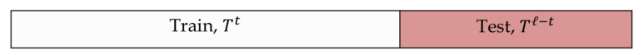

 - выбирается параметр t;
 - выборка разбивается всеми возможными способами на 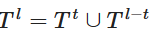

недостаток: количество разбиений быстро становится большим, даже при сравнительно малых t

# k-fold кросс-валидация

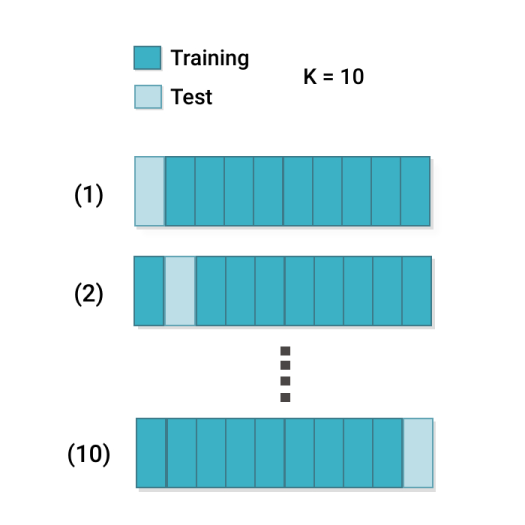

 - фиксируется значение k(ex,5...10);
 - модель обучается k раз (на выходе получаем оценки для k различных моделей);
 - исходный набор данных разбивается на k "примерно" одинаковых частей;
 - для всех значений i  from 1..k:
 -- iя часть набора данных - тестовая, остальные - тренировочные;
 -- модель обучается на k-1 части выборки, исключая i;
 -- оценка качества обучения производится на i-й части данных (тестовой);
 - итоговая оценка качества = среднее среди всех оценок, полученных во время тренировки k моделей.
 
 ! тренировочный процесс удлиняется.
 + создает непересекающиеся подмножества данных

In [34]:
import numpy as np
from sklearn.model_selection import KFold

X = np.random.normal(mu, sigma, N_total*features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)
num_folds = 2
kf = KFold(n_splits=num_folds, random_state=None, shuffle=False)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print("ITERATION NUMBER: ", i)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Iteration number is  0
TRAIN: [500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625
 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643
 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661
 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679
 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697
 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715
 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733
 734 735 736 737 738 

# Кросс-валидация по отдельным объектам (Leave-One-Out)

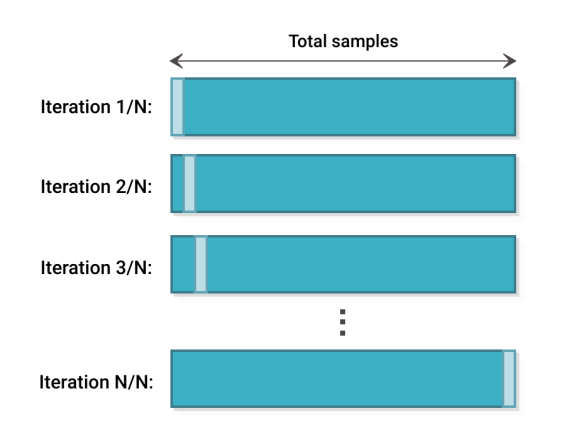

 - выбирается количество итераций N;
 - на каждой итерации:
    - в тестовом наборе данных оказывается 1 элемент, остальные - в тренировочном;
    - обучается модель;
    - проводится оценка качества работы модели.
 - итоговый показатель качества: усредненная характеристика по всем N моделям.

In [36]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

X = np.random.normal(mu, sigma, N_total*features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)
l_num = 3
loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(X)):
    print("ITERATION NUMBER: ", i)
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

ITERATION NUMBER:  0
TEST: [0]
ITERATION NUMBER:  1
TEST: [1]
ITERATION NUMBER:  2
TEST: [2]
ITERATION NUMBER:  3
TEST: [3]
ITERATION NUMBER:  4
TEST: [4]
ITERATION NUMBER:  5
TEST: [5]
ITERATION NUMBER:  6
TEST: [6]
ITERATION NUMBER:  7
TEST: [7]
ITERATION NUMBER:  8
TEST: [8]
ITERATION NUMBER:  9
TEST: [9]
ITERATION NUMBER:  10
TEST: [10]
ITERATION NUMBER:  11
TEST: [11]
ITERATION NUMBER:  12
TEST: [12]
ITERATION NUMBER:  13
TEST: [13]
ITERATION NUMBER:  14
TEST: [14]
ITERATION NUMBER:  15
TEST: [15]
ITERATION NUMBER:  16
TEST: [16]
ITERATION NUMBER:  17
TEST: [17]
ITERATION NUMBER:  18
TEST: [18]
ITERATION NUMBER:  19
TEST: [19]
ITERATION NUMBER:  20
TEST: [20]
ITERATION NUMBER:  21
TEST: [21]
ITERATION NUMBER:  22
TEST: [22]
ITERATION NUMBER:  23
TEST: [23]
ITERATION NUMBER:  24
TEST: [24]
ITERATION NUMBER:  25
TEST: [25]
ITERATION NUMBER:  26
TEST: [26]
ITERATION NUMBER:  27
TEST: [27]
ITERATION NUMBER:  28
TEST: [28]
ITERATION NUMBER:  29
TEST: [29]
ITERATION NUMBER:  30
TEST: [3

ITERATION NUMBER:  756
TEST: [756]
ITERATION NUMBER:  757
TEST: [757]
ITERATION NUMBER:  758
TEST: [758]
ITERATION NUMBER:  759
TEST: [759]
ITERATION NUMBER:  760
TEST: [760]
ITERATION NUMBER:  761
TEST: [761]
ITERATION NUMBER:  762
TEST: [762]
ITERATION NUMBER:  763
TEST: [763]
ITERATION NUMBER:  764
TEST: [764]
ITERATION NUMBER:  765
TEST: [765]
ITERATION NUMBER:  766
TEST: [766]
ITERATION NUMBER:  767
TEST: [767]
ITERATION NUMBER:  768
TEST: [768]
ITERATION NUMBER:  769
TEST: [769]
ITERATION NUMBER:  770
TEST: [770]
ITERATION NUMBER:  771
TEST: [771]
ITERATION NUMBER:  772
TEST: [772]
ITERATION NUMBER:  773
TEST: [773]
ITERATION NUMBER:  774
TEST: [774]
ITERATION NUMBER:  775
TEST: [775]
ITERATION NUMBER:  776
TEST: [776]
ITERATION NUMBER:  777
TEST: [777]
ITERATION NUMBER:  778
TEST: [778]
ITERATION NUMBER:  779
TEST: [779]
ITERATION NUMBER:  780
TEST: [780]
ITERATION NUMBER:  781
TEST: [781]
ITERATION NUMBER:  782
TEST: [782]
ITERATION NUMBER:  783
TEST: [783]
ITERATION NUMBER:  7

In [38]:
import numpy as np
from sklearn.model_selection import KFold

X = np.random.normal(mu, sigma, N_total*features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)
num_folds = N_total
kf = KFold(n_splits=num_folds, random_state=2, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print("ITERATION NUMBER: ", i)
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

ITERATION NUMBER:  0
TEST: [37]
ITERATION NUMBER:  1
TEST: [726]
ITERATION NUMBER:  2
TEST: [846]
ITERATION NUMBER:  3
TEST: [295]
ITERATION NUMBER:  4
TEST: [924]
ITERATION NUMBER:  5
TEST: [658]
ITERATION NUMBER:  6
TEST: [682]
ITERATION NUMBER:  7
TEST: [286]
ITERATION NUMBER:  8
TEST: [880]
ITERATION NUMBER:  9
TEST: [272]
ITERATION NUMBER:  10
TEST: [137]
ITERATION NUMBER:  11
TEST: [954]
ITERATION NUMBER:  12
TEST: [515]
ITERATION NUMBER:  13
TEST: [788]
ITERATION NUMBER:  14
TEST: [860]
ITERATION NUMBER:  15
TEST: [640]
ITERATION NUMBER:  16
TEST: [737]
ITERATION NUMBER:  17
TEST: [683]
ITERATION NUMBER:  18
TEST: [412]
ITERATION NUMBER:  19
TEST: [71]
ITERATION NUMBER:  20
TEST: [213]
ITERATION NUMBER:  21
TEST: [67]
ITERATION NUMBER:  22
TEST: [231]
ITERATION NUMBER:  23
TEST: [856]
ITERATION NUMBER:  24
TEST: [197]
ITERATION NUMBER:  25
TEST: [639]
ITERATION NUMBER:  26
TEST: [376]
ITERATION NUMBER:  27
TEST: [192]
ITERATION NUMBER:  28
TEST: [99]
ITERATION NUMBER:  29
TEST: 

ITERATION NUMBER:  693
TEST: [853]
ITERATION NUMBER:  694
TEST: [11]
ITERATION NUMBER:  695
TEST: [814]
ITERATION NUMBER:  696
TEST: [594]
ITERATION NUMBER:  697
TEST: [693]
ITERATION NUMBER:  698
TEST: [531]
ITERATION NUMBER:  699
TEST: [469]
ITERATION NUMBER:  700
TEST: [127]
ITERATION NUMBER:  701
TEST: [735]
ITERATION NUMBER:  702
TEST: [57]
ITERATION NUMBER:  703
TEST: [33]
ITERATION NUMBER:  704
TEST: [237]
ITERATION NUMBER:  705
TEST: [921]
ITERATION NUMBER:  706
TEST: [282]
ITERATION NUMBER:  707
TEST: [586]
ITERATION NUMBER:  708
TEST: [362]
ITERATION NUMBER:  709
TEST: [243]
ITERATION NUMBER:  710
TEST: [603]
ITERATION NUMBER:  711
TEST: [92]
ITERATION NUMBER:  712
TEST: [210]
ITERATION NUMBER:  713
TEST: [337]
ITERATION NUMBER:  714
TEST: [729]
ITERATION NUMBER:  715
TEST: [668]
ITERATION NUMBER:  716
TEST: [301]
ITERATION NUMBER:  717
TEST: [85]
ITERATION NUMBER:  718
TEST: [190]
ITERATION NUMBER:  719
TEST: [39]
ITERATION NUMBER:  720
TEST: [500]
ITERATION NUMBER:  721
TES

# Leave-p-out cross-validation

+ создает перекрывающиеся группы данных
Повторяется 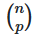 раз:
 - выбирается p экземляров - тестовый набор данных, оставшиеся n-p - тренировочные;
 - модель тренируется;
 -  оценивается качество тренированной модели;
 
 Итоговый показатель качества - средняя оценка среди всех 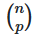 моделей.
 


In [41]:
import numpy as np
from sklearn.model_selection import LeavePOut

X = np.random.normal(mu, sigma, N_total*features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)
p = 3
lpo = LeavePOut(p)

for i, (train_index, test_index) in enumerate(lpo.split(X)):
    print("ITERATION NUMBER: ", i)
    print("TEST:", test_index[0])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

ITERATION NUMBER:  0
TEST: 0
ITERATION NUMBER:  1
TEST: 0
ITERATION NUMBER:  2
TEST: 0
ITERATION NUMBER:  3
TEST: 0
ITERATION NUMBER:  4
TEST: 0
ITERATION NUMBER:  5
TEST: 0
ITERATION NUMBER:  6
TEST: 0
ITERATION NUMBER:  7
TEST: 0
ITERATION NUMBER:  8
TEST: 0
ITERATION NUMBER:  9
TEST: 0
ITERATION NUMBER:  10
TEST: 0
ITERATION NUMBER:  11
TEST: 0
ITERATION NUMBER:  12
TEST: 0
ITERATION NUMBER:  13
TEST: 0
ITERATION NUMBER:  14
TEST: 0
ITERATION NUMBER:  15
TEST: 0
ITERATION NUMBER:  16
TEST: 0
ITERATION NUMBER:  17
TEST: 0
ITERATION NUMBER:  18
TEST: 0
ITERATION NUMBER:  19
TEST: 0
ITERATION NUMBER:  20
TEST: 0
ITERATION NUMBER:  21
TEST: 0
ITERATION NUMBER:  22
TEST: 0
ITERATION NUMBER:  23
TEST: 0
ITERATION NUMBER:  24
TEST: 0
ITERATION NUMBER:  25
TEST: 0
ITERATION NUMBER:  26
TEST: 0
ITERATION NUMBER:  27
TEST: 0
ITERATION NUMBER:  28
TEST: 0
ITERATION NUMBER:  29
TEST: 0
ITERATION NUMBER:  30
TEST: 0
ITERATION NUMBER:  31
TEST: 0
ITERATION NUMBER:  32
TEST: 0
ITERATION NUMBER:  3

ITERATION NUMBER:  1436
TEST: 0
ITERATION NUMBER:  1437
TEST: 0
ITERATION NUMBER:  1438
TEST: 0
ITERATION NUMBER:  1439
TEST: 0
ITERATION NUMBER:  1440
TEST: 0
ITERATION NUMBER:  1441
TEST: 0
ITERATION NUMBER:  1442
TEST: 0
ITERATION NUMBER:  1443
TEST: 0
ITERATION NUMBER:  1444
TEST: 0
ITERATION NUMBER:  1445
TEST: 0
ITERATION NUMBER:  1446
TEST: 0
ITERATION NUMBER:  1447
TEST: 0
ITERATION NUMBER:  1448
TEST: 0
ITERATION NUMBER:  1449
TEST: 0
ITERATION NUMBER:  1450
TEST: 0
ITERATION NUMBER:  1451
TEST: 0
ITERATION NUMBER:  1452
TEST: 0
ITERATION NUMBER:  1453
TEST: 0
ITERATION NUMBER:  1454
TEST: 0
ITERATION NUMBER:  1455
TEST: 0
ITERATION NUMBER:  1456
TEST: 0
ITERATION NUMBER:  1457
TEST: 0
ITERATION NUMBER:  1458
TEST: 0
ITERATION NUMBER:  1459
TEST: 0
ITERATION NUMBER:  1460
TEST: 0
ITERATION NUMBER:  1461
TEST: 0
ITERATION NUMBER:  1462
TEST: 0
ITERATION NUMBER:  1463
TEST: 0
ITERATION NUMBER:  1464
TEST: 0
ITERATION NUMBER:  1465
TEST: 0
ITERATION NUMBER:  1466
TEST: 0
ITERATIO

ITERATION NUMBER:  3332
TEST: 0
ITERATION NUMBER:  3333
TEST: 0
ITERATION NUMBER:  3334
TEST: 0
ITERATION NUMBER:  3335
TEST: 0
ITERATION NUMBER:  3336
TEST: 0
ITERATION NUMBER:  3337
TEST: 0
ITERATION NUMBER:  3338
TEST: 0
ITERATION NUMBER:  3339
TEST: 0
ITERATION NUMBER:  3340
TEST: 0
ITERATION NUMBER:  3341
TEST: 0
ITERATION NUMBER:  3342
TEST: 0
ITERATION NUMBER:  3343
TEST: 0
ITERATION NUMBER:  3344
TEST: 0
ITERATION NUMBER:  3345
TEST: 0
ITERATION NUMBER:  3346
TEST: 0
ITERATION NUMBER:  3347
TEST: 0
ITERATION NUMBER:  3348
TEST: 0
ITERATION NUMBER:  3349
TEST: 0
ITERATION NUMBER:  3350
TEST: 0
ITERATION NUMBER:  3351
TEST: 0
ITERATION NUMBER:  3352
TEST: 0
ITERATION NUMBER:  3353
TEST: 0
ITERATION NUMBER:  3354
TEST: 0
ITERATION NUMBER:  3355
TEST: 0
ITERATION NUMBER:  3356
TEST: 0
ITERATION NUMBER:  3357
TEST: 0
ITERATION NUMBER:  3358
TEST: 0
ITERATION NUMBER:  3359
TEST: 0
ITERATION NUMBER:  3360
TEST: 0
ITERATION NUMBER:  3361
TEST: 0
ITERATION NUMBER:  3362
TEST: 0
ITERATIO

ITERATION NUMBER:  4923
TEST: 0
ITERATION NUMBER:  4924
TEST: 0
ITERATION NUMBER:  4925
TEST: 0
ITERATION NUMBER:  4926
TEST: 0
ITERATION NUMBER:  4927
TEST: 0
ITERATION NUMBER:  4928
TEST: 0
ITERATION NUMBER:  4929
TEST: 0
ITERATION NUMBER:  4930
TEST: 0
ITERATION NUMBER:  4931
TEST: 0
ITERATION NUMBER:  4932
TEST: 0
ITERATION NUMBER:  4933
TEST: 0
ITERATION NUMBER:  4934
TEST: 0
ITERATION NUMBER:  4935
TEST: 0
ITERATION NUMBER:  4936
TEST: 0
ITERATION NUMBER:  4937
TEST: 0
ITERATION NUMBER:  4938
TEST: 0
ITERATION NUMBER:  4939
TEST: 0
ITERATION NUMBER:  4940
TEST: 0
ITERATION NUMBER:  4941
TEST: 0
ITERATION NUMBER:  4942
TEST: 0
ITERATION NUMBER:  4943
TEST: 0
ITERATION NUMBER:  4944
TEST: 0
ITERATION NUMBER:  4945
TEST: 0
ITERATION NUMBER:  4946
TEST: 0
ITERATION NUMBER:  4947
TEST: 0
ITERATION NUMBER:  4948
TEST: 0
ITERATION NUMBER:  4949
TEST: 0
ITERATION NUMBER:  4950
TEST: 0
ITERATION NUMBER:  4951
TEST: 0
ITERATION NUMBER:  4952
TEST: 0
ITERATION NUMBER:  4953
TEST: 0
ITERATIO

ITERATION NUMBER:  6400
TEST: 0
ITERATION NUMBER:  6401
TEST: 0
ITERATION NUMBER:  6402
TEST: 0
ITERATION NUMBER:  6403
TEST: 0
ITERATION NUMBER:  6404
TEST: 0
ITERATION NUMBER:  6405
TEST: 0
ITERATION NUMBER:  6406
TEST: 0
ITERATION NUMBER:  6407
TEST: 0
ITERATION NUMBER:  6408
TEST: 0
ITERATION NUMBER:  6409
TEST: 0
ITERATION NUMBER:  6410
TEST: 0
ITERATION NUMBER:  6411
TEST: 0
ITERATION NUMBER:  6412
TEST: 0
ITERATION NUMBER:  6413
TEST: 0
ITERATION NUMBER:  6414
TEST: 0
ITERATION NUMBER:  6415
TEST: 0
ITERATION NUMBER:  6416
TEST: 0
ITERATION NUMBER:  6417
TEST: 0
ITERATION NUMBER:  6418
TEST: 0
ITERATION NUMBER:  6419
TEST: 0
ITERATION NUMBER:  6420
TEST: 0
ITERATION NUMBER:  6421
TEST: 0
ITERATION NUMBER:  6422
TEST: 0
ITERATION NUMBER:  6423
TEST: 0
ITERATION NUMBER:  6424
TEST: 0
ITERATION NUMBER:  6425
TEST: 0
ITERATION NUMBER:  6426
TEST: 0
ITERATION NUMBER:  6427
TEST: 0
ITERATION NUMBER:  6428
TEST: 0
ITERATION NUMBER:  6429
TEST: 0
ITERATION NUMBER:  6430
TEST: 0
ITERATIO

ITERATION NUMBER:  8042
TEST: 0
ITERATION NUMBER:  8043
TEST: 0
ITERATION NUMBER:  8044
TEST: 0
ITERATION NUMBER:  8045
TEST: 0
ITERATION NUMBER:  8046
TEST: 0
ITERATION NUMBER:  8047
TEST: 0
ITERATION NUMBER:  8048
TEST: 0
ITERATION NUMBER:  8049
TEST: 0
ITERATION NUMBER:  8050
TEST: 0
ITERATION NUMBER:  8051
TEST: 0
ITERATION NUMBER:  8052
TEST: 0
ITERATION NUMBER:  8053
TEST: 0
ITERATION NUMBER:  8054
TEST: 0
ITERATION NUMBER:  8055
TEST: 0
ITERATION NUMBER:  8056
TEST: 0
ITERATION NUMBER:  8057
TEST: 0
ITERATION NUMBER:  8058
TEST: 0
ITERATION NUMBER:  8059
TEST: 0
ITERATION NUMBER:  8060
TEST: 0
ITERATION NUMBER:  8061
TEST: 0
ITERATION NUMBER:  8062
TEST: 0
ITERATION NUMBER:  8063
TEST: 0
ITERATION NUMBER:  8064
TEST: 0
ITERATION NUMBER:  8065
TEST: 0
ITERATION NUMBER:  8066
TEST: 0
ITERATION NUMBER:  8067
TEST: 0
ITERATION NUMBER:  8068
TEST: 0
ITERATION NUMBER:  8069
TEST: 0
ITERATION NUMBER:  8070
TEST: 0
ITERATION NUMBER:  8071
TEST: 0
ITERATION NUMBER:  8072
TEST: 0
ITERATIO

ITERATION NUMBER:  9868
TEST: 0
ITERATION NUMBER:  9869
TEST: 0
ITERATION NUMBER:  9870
TEST: 0
ITERATION NUMBER:  9871
TEST: 0
ITERATION NUMBER:  9872
TEST: 0
ITERATION NUMBER:  9873
TEST: 0
ITERATION NUMBER:  9874
TEST: 0
ITERATION NUMBER:  9875
TEST: 0
ITERATION NUMBER:  9876
TEST: 0
ITERATION NUMBER:  9877
TEST: 0
ITERATION NUMBER:  9878
TEST: 0
ITERATION NUMBER:  9879
TEST: 0
ITERATION NUMBER:  9880
TEST: 0
ITERATION NUMBER:  9881
TEST: 0
ITERATION NUMBER:  9882
TEST: 0
ITERATION NUMBER:  9883
TEST: 0
ITERATION NUMBER:  9884
TEST: 0
ITERATION NUMBER:  9885
TEST: 0
ITERATION NUMBER:  9886
TEST: 0
ITERATION NUMBER:  9887
TEST: 0
ITERATION NUMBER:  9888
TEST: 0
ITERATION NUMBER:  9889
TEST: 0
ITERATION NUMBER:  9890
TEST: 0
ITERATION NUMBER:  9891
TEST: 0
ITERATION NUMBER:  9892
TEST: 0
ITERATION NUMBER:  9893
TEST: 0
ITERATION NUMBER:  9894
TEST: 0
ITERATION NUMBER:  9895
TEST: 0
ITERATION NUMBER:  9896
TEST: 0
ITERATION NUMBER:  9897
TEST: 0
ITERATION NUMBER:  9898
TEST: 0
ITERATIO

ITERATION NUMBER:  11597
TEST: 0
ITERATION NUMBER:  11598
TEST: 0
ITERATION NUMBER:  11599
TEST: 0
ITERATION NUMBER:  11600
TEST: 0
ITERATION NUMBER:  11601
TEST: 0
ITERATION NUMBER:  11602
TEST: 0
ITERATION NUMBER:  11603
TEST: 0
ITERATION NUMBER:  11604
TEST: 0
ITERATION NUMBER:  11605
TEST: 0
ITERATION NUMBER:  11606
TEST: 0
ITERATION NUMBER:  11607
TEST: 0
ITERATION NUMBER:  11608
TEST: 0
ITERATION NUMBER:  11609
TEST: 0
ITERATION NUMBER:  11610
TEST: 0
ITERATION NUMBER:  11611
TEST: 0
ITERATION NUMBER:  11612
TEST: 0
ITERATION NUMBER:  11613
TEST: 0
ITERATION NUMBER:  11614
TEST: 0
ITERATION NUMBER:  11615
TEST: 0
ITERATION NUMBER:  11616
TEST: 0
ITERATION NUMBER:  11617
TEST: 0
ITERATION NUMBER:  11618
TEST: 0
ITERATION NUMBER:  11619
TEST: 0
ITERATION NUMBER:  11620
TEST: 0
ITERATION NUMBER:  11621
TEST: 0
ITERATION NUMBER:  11622
TEST: 0
ITERATION NUMBER:  11623
TEST: 0
ITERATION NUMBER:  11624
TEST: 0
ITERATION NUMBER:  11625
TEST: 0
ITERATION NUMBER:  11626
TEST: 0
ITERATION 

ITERATION NUMBER:  13229
TEST: 0
ITERATION NUMBER:  13230
TEST: 0
ITERATION NUMBER:  13231
TEST: 0
ITERATION NUMBER:  13232
TEST: 0
ITERATION NUMBER:  13233
TEST: 0
ITERATION NUMBER:  13234
TEST: 0
ITERATION NUMBER:  13235
TEST: 0
ITERATION NUMBER:  13236
TEST: 0
ITERATION NUMBER:  13237
TEST: 0
ITERATION NUMBER:  13238
TEST: 0
ITERATION NUMBER:  13239
TEST: 0
ITERATION NUMBER:  13240
TEST: 0
ITERATION NUMBER:  13241
TEST: 0
ITERATION NUMBER:  13242
TEST: 0
ITERATION NUMBER:  13243
TEST: 0
ITERATION NUMBER:  13244
TEST: 0
ITERATION NUMBER:  13245
TEST: 0
ITERATION NUMBER:  13246
TEST: 0
ITERATION NUMBER:  13247
TEST: 0
ITERATION NUMBER:  13248
TEST: 0
ITERATION NUMBER:  13249
TEST: 0
ITERATION NUMBER:  13250
TEST: 0
ITERATION NUMBER:  13251
TEST: 0
ITERATION NUMBER:  13252
TEST: 0
ITERATION NUMBER:  13253
TEST: 0
ITERATION NUMBER:  13254
TEST: 0
ITERATION NUMBER:  13255
TEST: 0
ITERATION NUMBER:  13256
TEST: 0
ITERATION NUMBER:  13257
TEST: 0
ITERATION NUMBER:  13258
TEST: 0
ITERATION 

ITERATION NUMBER:  14986
TEST: 0
ITERATION NUMBER:  14987
TEST: 0
ITERATION NUMBER:  14988
TEST: 0
ITERATION NUMBER:  14989
TEST: 0
ITERATION NUMBER:  14990
TEST: 0
ITERATION NUMBER:  14991
TEST: 0
ITERATION NUMBER:  14992
TEST: 0
ITERATION NUMBER:  14993
TEST: 0
ITERATION NUMBER:  14994
TEST: 0
ITERATION NUMBER:  14995
TEST: 0
ITERATION NUMBER:  14996
TEST: 0
ITERATION NUMBER:  14997
TEST: 0
ITERATION NUMBER:  14998
TEST: 0
ITERATION NUMBER:  14999
TEST: 0
ITERATION NUMBER:  15000
TEST: 0
ITERATION NUMBER:  15001
TEST: 0
ITERATION NUMBER:  15002
TEST: 0
ITERATION NUMBER:  15003
TEST: 0
ITERATION NUMBER:  15004
TEST: 0
ITERATION NUMBER:  15005
TEST: 0
ITERATION NUMBER:  15006
TEST: 0
ITERATION NUMBER:  15007
TEST: 0
ITERATION NUMBER:  15008
TEST: 0
ITERATION NUMBER:  15009
TEST: 0
ITERATION NUMBER:  15010
TEST: 0
ITERATION NUMBER:  15011
TEST: 0
ITERATION NUMBER:  15012
TEST: 0
ITERATION NUMBER:  15013
TEST: 0
ITERATION NUMBER:  15014
TEST: 0
ITERATION NUMBER:  15015
TEST: 0
ITERATION 

ITERATION NUMBER:  16951
TEST: 0
ITERATION NUMBER:  16952
TEST: 0
ITERATION NUMBER:  16953
TEST: 0
ITERATION NUMBER:  16954
TEST: 0
ITERATION NUMBER:  16955
TEST: 0
ITERATION NUMBER:  16956
TEST: 0
ITERATION NUMBER:  16957
TEST: 0
ITERATION NUMBER:  16958
TEST: 0
ITERATION NUMBER:  16959
TEST: 0
ITERATION NUMBER:  16960
TEST: 0
ITERATION NUMBER:  16961
TEST: 0
ITERATION NUMBER:  16962
TEST: 0
ITERATION NUMBER:  16963
TEST: 0
ITERATION NUMBER:  16964
TEST: 0
ITERATION NUMBER:  16965
TEST: 0
ITERATION NUMBER:  16966
TEST: 0
ITERATION NUMBER:  16967
TEST: 0
ITERATION NUMBER:  16968
TEST: 0
ITERATION NUMBER:  16969
TEST: 0
ITERATION NUMBER:  16970
TEST: 0
ITERATION NUMBER:  16971
TEST: 0
ITERATION NUMBER:  16972
TEST: 0
ITERATION NUMBER:  16973
TEST: 0
ITERATION NUMBER:  16974
TEST: 0
ITERATION NUMBER:  16975
TEST: 0
ITERATION NUMBER:  16976
TEST: 0
ITERATION NUMBER:  16977
TEST: 0
ITERATION NUMBER:  16978
TEST: 0
ITERATION NUMBER:  16979
TEST: 0
ITERATION NUMBER:  16980
TEST: 0
ITERATION 

ITERATION NUMBER:  18357
TEST: 0
ITERATION NUMBER:  18358
TEST: 0
ITERATION NUMBER:  18359
TEST: 0
ITERATION NUMBER:  18360
TEST: 0
ITERATION NUMBER:  18361
TEST: 0
ITERATION NUMBER:  18362
TEST: 0
ITERATION NUMBER:  18363
TEST: 0
ITERATION NUMBER:  18364
TEST: 0
ITERATION NUMBER:  18365
TEST: 0
ITERATION NUMBER:  18366
TEST: 0
ITERATION NUMBER:  18367
TEST: 0
ITERATION NUMBER:  18368
TEST: 0
ITERATION NUMBER:  18369
TEST: 0
ITERATION NUMBER:  18370
TEST: 0
ITERATION NUMBER:  18371
TEST: 0
ITERATION NUMBER:  18372
TEST: 0
ITERATION NUMBER:  18373
TEST: 0
ITERATION NUMBER:  18374
TEST: 0
ITERATION NUMBER:  18375
TEST: 0
ITERATION NUMBER:  18376
TEST: 0
ITERATION NUMBER:  18377
TEST: 0
ITERATION NUMBER:  18378
TEST: 0
ITERATION NUMBER:  18379
TEST: 0
ITERATION NUMBER:  18380
TEST: 0
ITERATION NUMBER:  18381
TEST: 0
ITERATION NUMBER:  18382
TEST: 0
ITERATION NUMBER:  18383
TEST: 0
ITERATION NUMBER:  18384
TEST: 0
ITERATION NUMBER:  18385
TEST: 0
ITERATION NUMBER:  18386
TEST: 0
ITERATION 

ITERATION NUMBER:  19721
TEST: 0
ITERATION NUMBER:  19722
TEST: 0
ITERATION NUMBER:  19723
TEST: 0
ITERATION NUMBER:  19724
TEST: 0
ITERATION NUMBER:  19725
TEST: 0
ITERATION NUMBER:  19726
TEST: 0
ITERATION NUMBER:  19727
TEST: 0
ITERATION NUMBER:  19728
TEST: 0
ITERATION NUMBER:  19729
TEST: 0
ITERATION NUMBER:  19730
TEST: 0
ITERATION NUMBER:  19731
TEST: 0
ITERATION NUMBER:  19732
TEST: 0
ITERATION NUMBER:  19733
TEST: 0
ITERATION NUMBER:  19734
TEST: 0
ITERATION NUMBER:  19735
TEST: 0
ITERATION NUMBER:  19736
TEST: 0
ITERATION NUMBER:  19737
TEST: 0
ITERATION NUMBER:  19738
TEST: 0
ITERATION NUMBER:  19739
TEST: 0
ITERATION NUMBER:  19740
TEST: 0
ITERATION NUMBER:  19741
TEST: 0
ITERATION NUMBER:  19742
TEST: 0
ITERATION NUMBER:  19743
TEST: 0
ITERATION NUMBER:  19744
TEST: 0
ITERATION NUMBER:  19745
TEST: 0
ITERATION NUMBER:  19746
TEST: 0
ITERATION NUMBER:  19747
TEST: 0
ITERATION NUMBER:  19748
TEST: 0
ITERATION NUMBER:  19749
TEST: 0
ITERATION NUMBER:  19750
TEST: 0
ITERATION 

ITERATION NUMBER:  21803
TEST: 0
ITERATION NUMBER:  21804
TEST: 0
ITERATION NUMBER:  21805
TEST: 0
ITERATION NUMBER:  21806
TEST: 0
ITERATION NUMBER:  21807
TEST: 0
ITERATION NUMBER:  21808
TEST: 0
ITERATION NUMBER:  21809
TEST: 0
ITERATION NUMBER:  21810
TEST: 0
ITERATION NUMBER:  21811
TEST: 0
ITERATION NUMBER:  21812
TEST: 0
ITERATION NUMBER:  21813
TEST: 0
ITERATION NUMBER:  21814
TEST: 0
ITERATION NUMBER:  21815
TEST: 0
ITERATION NUMBER:  21816
TEST: 0
ITERATION NUMBER:  21817
TEST: 0
ITERATION NUMBER:  21818
TEST: 0
ITERATION NUMBER:  21819
TEST: 0
ITERATION NUMBER:  21820
TEST: 0
ITERATION NUMBER:  21821
TEST: 0
ITERATION NUMBER:  21822
TEST: 0
ITERATION NUMBER:  21823
TEST: 0
ITERATION NUMBER:  21824
TEST: 0
ITERATION NUMBER:  21825
TEST: 0
ITERATION NUMBER:  21826
TEST: 0
ITERATION NUMBER:  21827
TEST: 0
ITERATION NUMBER:  21828
TEST: 0
ITERATION NUMBER:  21829
TEST: 0
ITERATION NUMBER:  21830
TEST: 0
ITERATION NUMBER:  21831
TEST: 0
ITERATION NUMBER:  21832
TEST: 0
ITERATION 

ITERATION NUMBER:  23545
TEST: 0
ITERATION NUMBER:  23546
TEST: 0
ITERATION NUMBER:  23547
TEST: 0
ITERATION NUMBER:  23548
TEST: 0
ITERATION NUMBER:  23549
TEST: 0
ITERATION NUMBER:  23550
TEST: 0
ITERATION NUMBER:  23551
TEST: 0
ITERATION NUMBER:  23552
TEST: 0
ITERATION NUMBER:  23553
TEST: 0
ITERATION NUMBER:  23554
TEST: 0
ITERATION NUMBER:  23555
TEST: 0
ITERATION NUMBER:  23556
TEST: 0
ITERATION NUMBER:  23557
TEST: 0
ITERATION NUMBER:  23558
TEST: 0
ITERATION NUMBER:  23559
TEST: 0
ITERATION NUMBER:  23560
TEST: 0
ITERATION NUMBER:  23561
TEST: 0
ITERATION NUMBER:  23562
TEST: 0
ITERATION NUMBER:  23563
TEST: 0
ITERATION NUMBER:  23564
TEST: 0
ITERATION NUMBER:  23565
TEST: 0
ITERATION NUMBER:  23566
TEST: 0
ITERATION NUMBER:  23567
TEST: 0
ITERATION NUMBER:  23568
TEST: 0
ITERATION NUMBER:  23569
TEST: 0
ITERATION NUMBER:  23570
TEST: 0
ITERATION NUMBER:  23571
TEST: 0
ITERATION NUMBER:  23572
TEST: 0
ITERATION NUMBER:  23573
TEST: 0
ITERATION NUMBER:  23574
TEST: 0
ITERATION 

ITERATION NUMBER:  25307
TEST: 0
ITERATION NUMBER:  25308
TEST: 0
ITERATION NUMBER:  25309
TEST: 0
ITERATION NUMBER:  25310
TEST: 0
ITERATION NUMBER:  25311
TEST: 0
ITERATION NUMBER:  25312
TEST: 0
ITERATION NUMBER:  25313
TEST: 0
ITERATION NUMBER:  25314
TEST: 0
ITERATION NUMBER:  25315
TEST: 0
ITERATION NUMBER:  25316
TEST: 0
ITERATION NUMBER:  25317
TEST: 0
ITERATION NUMBER:  25318
TEST: 0
ITERATION NUMBER:  25319
TEST: 0
ITERATION NUMBER:  25320
TEST: 0
ITERATION NUMBER:  25321
TEST: 0
ITERATION NUMBER:  25322
TEST: 0
ITERATION NUMBER:  25323
TEST: 0
ITERATION NUMBER:  25324
TEST: 0
ITERATION NUMBER:  25325
TEST: 0
ITERATION NUMBER:  25326
TEST: 0
ITERATION NUMBER:  25327
TEST: 0
ITERATION NUMBER:  25328
TEST: 0
ITERATION NUMBER:  25329
TEST: 0
ITERATION NUMBER:  25330
TEST: 0
ITERATION NUMBER:  25331
TEST: 0
ITERATION NUMBER:  25332
TEST: 0
ITERATION NUMBER:  25333
TEST: 0
ITERATION NUMBER:  25334
TEST: 0
ITERATION NUMBER:  25335
TEST: 0
ITERATION NUMBER:  25336
TEST: 0
ITERATION 

ITERATION NUMBER:  27026
TEST: 0
ITERATION NUMBER:  27027
TEST: 0
ITERATION NUMBER:  27028
TEST: 0
ITERATION NUMBER:  27029
TEST: 0
ITERATION NUMBER:  27030
TEST: 0
ITERATION NUMBER:  27031
TEST: 0
ITERATION NUMBER:  27032
TEST: 0
ITERATION NUMBER:  27033
TEST: 0
ITERATION NUMBER:  27034
TEST: 0
ITERATION NUMBER:  27035
TEST: 0
ITERATION NUMBER:  27036
TEST: 0
ITERATION NUMBER:  27037
TEST: 0
ITERATION NUMBER:  27038
TEST: 0
ITERATION NUMBER:  27039
TEST: 0
ITERATION NUMBER:  27040
TEST: 0
ITERATION NUMBER:  27041
TEST: 0
ITERATION NUMBER:  27042
TEST: 0
ITERATION NUMBER:  27043
TEST: 0
ITERATION NUMBER:  27044
TEST: 0
ITERATION NUMBER:  27045
TEST: 0
ITERATION NUMBER:  27046
TEST: 0
ITERATION NUMBER:  27047
TEST: 0
ITERATION NUMBER:  27048
TEST: 0
ITERATION NUMBER:  27049
TEST: 0
ITERATION NUMBER:  27050
TEST: 0
ITERATION NUMBER:  27051
TEST: 0
ITERATION NUMBER:  27052
TEST: 0
ITERATION NUMBER:  27053
TEST: 0
ITERATION NUMBER:  27054
TEST: 0
ITERATION NUMBER:  27055
TEST: 0
ITERATION 

ITERATION NUMBER:  28787
TEST: 0
ITERATION NUMBER:  28788
TEST: 0
ITERATION NUMBER:  28789
TEST: 0
ITERATION NUMBER:  28790
TEST: 0
ITERATION NUMBER:  28791
TEST: 0
ITERATION NUMBER:  28792
TEST: 0
ITERATION NUMBER:  28793
TEST: 0
ITERATION NUMBER:  28794
TEST: 0
ITERATION NUMBER:  28795
TEST: 0
ITERATION NUMBER:  28796
TEST: 0
ITERATION NUMBER:  28797
TEST: 0
ITERATION NUMBER:  28798
TEST: 0
ITERATION NUMBER:  28799
TEST: 0
ITERATION NUMBER:  28800
TEST: 0
ITERATION NUMBER:  28801
TEST: 0
ITERATION NUMBER:  28802
TEST: 0
ITERATION NUMBER:  28803
TEST: 0
ITERATION NUMBER:  28804
TEST: 0
ITERATION NUMBER:  28805
TEST: 0
ITERATION NUMBER:  28806
TEST: 0
ITERATION NUMBER:  28807
TEST: 0
ITERATION NUMBER:  28808
TEST: 0
ITERATION NUMBER:  28809
TEST: 0
ITERATION NUMBER:  28810
TEST: 0
ITERATION NUMBER:  28811
TEST: 0
ITERATION NUMBER:  28812
TEST: 0
ITERATION NUMBER:  28813
TEST: 0
ITERATION NUMBER:  28814
TEST: 0
ITERATION NUMBER:  28815
TEST: 0
ITERATION NUMBER:  28816
TEST: 0
ITERATION 

ITERATION NUMBER:  30157
TEST: 0
ITERATION NUMBER:  30158
TEST: 0
ITERATION NUMBER:  30159
TEST: 0
ITERATION NUMBER:  30160
TEST: 0
ITERATION NUMBER:  30161
TEST: 0
ITERATION NUMBER:  30162
TEST: 0
ITERATION NUMBER:  30163
TEST: 0
ITERATION NUMBER:  30164
TEST: 0
ITERATION NUMBER:  30165
TEST: 0
ITERATION NUMBER:  30166
TEST: 0
ITERATION NUMBER:  30167
TEST: 0
ITERATION NUMBER:  30168
TEST: 0
ITERATION NUMBER:  30169
TEST: 0
ITERATION NUMBER:  30170
TEST: 0
ITERATION NUMBER:  30171
TEST: 0
ITERATION NUMBER:  30172
TEST: 0
ITERATION NUMBER:  30173
TEST: 0
ITERATION NUMBER:  30174
TEST: 0
ITERATION NUMBER:  30175
TEST: 0
ITERATION NUMBER:  30176
TEST: 0
ITERATION NUMBER:  30177
TEST: 0
ITERATION NUMBER:  30178
TEST: 0
ITERATION NUMBER:  30179
TEST: 0
ITERATION NUMBER:  30180
TEST: 0
ITERATION NUMBER:  30181
TEST: 0
ITERATION NUMBER:  30182
TEST: 0
ITERATION NUMBER:  30183
TEST: 0
ITERATION NUMBER:  30184
TEST: 0
ITERATION NUMBER:  30185
TEST: 0
ITERATION NUMBER:  30186
TEST: 0
ITERATION 

ITERATION NUMBER:  31589
TEST: 0
ITERATION NUMBER:  31590
TEST: 0
ITERATION NUMBER:  31591
TEST: 0
ITERATION NUMBER:  31592
TEST: 0
ITERATION NUMBER:  31593
TEST: 0
ITERATION NUMBER:  31594
TEST: 0
ITERATION NUMBER:  31595
TEST: 0
ITERATION NUMBER:  31596
TEST: 0
ITERATION NUMBER:  31597
TEST: 0
ITERATION NUMBER:  31598
TEST: 0
ITERATION NUMBER:  31599
TEST: 0
ITERATION NUMBER:  31600
TEST: 0
ITERATION NUMBER:  31601
TEST: 0
ITERATION NUMBER:  31602
TEST: 0
ITERATION NUMBER:  31603
TEST: 0
ITERATION NUMBER:  31604
TEST: 0
ITERATION NUMBER:  31605
TEST: 0
ITERATION NUMBER:  31606
TEST: 0
ITERATION NUMBER:  31607
TEST: 0
ITERATION NUMBER:  31608
TEST: 0
ITERATION NUMBER:  31609
TEST: 0
ITERATION NUMBER:  31610
TEST: 0
ITERATION NUMBER:  31611
TEST: 0
ITERATION NUMBER:  31612
TEST: 0
ITERATION NUMBER:  31613
TEST: 0
ITERATION NUMBER:  31614
TEST: 0
ITERATION NUMBER:  31615
TEST: 0
ITERATION NUMBER:  31616
TEST: 0
ITERATION NUMBER:  31617
TEST: 0
ITERATION NUMBER:  31618
TEST: 0
ITERATION 

ITERATION NUMBER:  32955
TEST: 0
ITERATION NUMBER:  32956
TEST: 0
ITERATION NUMBER:  32957
TEST: 0
ITERATION NUMBER:  32958
TEST: 0
ITERATION NUMBER:  32959
TEST: 0
ITERATION NUMBER:  32960
TEST: 0
ITERATION NUMBER:  32961
TEST: 0
ITERATION NUMBER:  32962
TEST: 0
ITERATION NUMBER:  32963
TEST: 0
ITERATION NUMBER:  32964
TEST: 0
ITERATION NUMBER:  32965
TEST: 0
ITERATION NUMBER:  32966
TEST: 0
ITERATION NUMBER:  32967
TEST: 0
ITERATION NUMBER:  32968
TEST: 0
ITERATION NUMBER:  32969
TEST: 0
ITERATION NUMBER:  32970
TEST: 0
ITERATION NUMBER:  32971
TEST: 0
ITERATION NUMBER:  32972
TEST: 0
ITERATION NUMBER:  32973
TEST: 0
ITERATION NUMBER:  32974
TEST: 0
ITERATION NUMBER:  32975
TEST: 0
ITERATION NUMBER:  32976
TEST: 0
ITERATION NUMBER:  32977
TEST: 0
ITERATION NUMBER:  32978
TEST: 0
ITERATION NUMBER:  32979
TEST: 0
ITERATION NUMBER:  32980
TEST: 0
ITERATION NUMBER:  32981
TEST: 0
ITERATION NUMBER:  32982
TEST: 0
ITERATION NUMBER:  32983
TEST: 0
ITERATION NUMBER:  32984
TEST: 0
ITERATION 

ITERATION NUMBER:  34632
TEST: 0
ITERATION NUMBER:  34633
TEST: 0
ITERATION NUMBER:  34634
TEST: 0
ITERATION NUMBER:  34635
TEST: 0
ITERATION NUMBER:  34636
TEST: 0
ITERATION NUMBER:  34637
TEST: 0
ITERATION NUMBER:  34638
TEST: 0
ITERATION NUMBER:  34639
TEST: 0
ITERATION NUMBER:  34640
TEST: 0
ITERATION NUMBER:  34641
TEST: 0
ITERATION NUMBER:  34642
TEST: 0
ITERATION NUMBER:  34643
TEST: 0
ITERATION NUMBER:  34644
TEST: 0
ITERATION NUMBER:  34645
TEST: 0
ITERATION NUMBER:  34646
TEST: 0
ITERATION NUMBER:  34647
TEST: 0
ITERATION NUMBER:  34648
TEST: 0
ITERATION NUMBER:  34649
TEST: 0
ITERATION NUMBER:  34650
TEST: 0
ITERATION NUMBER:  34651
TEST: 0
ITERATION NUMBER:  34652
TEST: 0
ITERATION NUMBER:  34653
TEST: 0
ITERATION NUMBER:  34654
TEST: 0
ITERATION NUMBER:  34655
TEST: 0
ITERATION NUMBER:  34656
TEST: 0
ITERATION NUMBER:  34657
TEST: 0
ITERATION NUMBER:  34658
TEST: 0
ITERATION NUMBER:  34659
TEST: 0
ITERATION NUMBER:  34660
TEST: 0
ITERATION NUMBER:  34661
TEST: 0
ITERATION 

ITERATION NUMBER:  36402
TEST: 0
ITERATION NUMBER:  36403
TEST: 0
ITERATION NUMBER:  36404
TEST: 0
ITERATION NUMBER:  36405
TEST: 0
ITERATION NUMBER:  36406
TEST: 0
ITERATION NUMBER:  36407
TEST: 0
ITERATION NUMBER:  36408
TEST: 0
ITERATION NUMBER:  36409
TEST: 0
ITERATION NUMBER:  36410
TEST: 0
ITERATION NUMBER:  36411
TEST: 0
ITERATION NUMBER:  36412
TEST: 0
ITERATION NUMBER:  36413
TEST: 0
ITERATION NUMBER:  36414
TEST: 0
ITERATION NUMBER:  36415
TEST: 0
ITERATION NUMBER:  36416
TEST: 0
ITERATION NUMBER:  36417
TEST: 0
ITERATION NUMBER:  36418
TEST: 0
ITERATION NUMBER:  36419
TEST: 0
ITERATION NUMBER:  36420
TEST: 0
ITERATION NUMBER:  36421
TEST: 0
ITERATION NUMBER:  36422
TEST: 0
ITERATION NUMBER:  36423
TEST: 0
ITERATION NUMBER:  36424
TEST: 0
ITERATION NUMBER:  36425
TEST: 0
ITERATION NUMBER:  36426
TEST: 0
ITERATION NUMBER:  36427
TEST: 0
ITERATION NUMBER:  36428
TEST: 0
ITERATION NUMBER:  36429
TEST: 0
ITERATION NUMBER:  36430
TEST: 0
ITERATION NUMBER:  36431
TEST: 0
ITERATION 

ITERATION NUMBER:  38071
TEST: 0
ITERATION NUMBER:  38072
TEST: 0
ITERATION NUMBER:  38073
TEST: 0
ITERATION NUMBER:  38074
TEST: 0
ITERATION NUMBER:  38075
TEST: 0
ITERATION NUMBER:  38076
TEST: 0
ITERATION NUMBER:  38077
TEST: 0
ITERATION NUMBER:  38078
TEST: 0
ITERATION NUMBER:  38079
TEST: 0
ITERATION NUMBER:  38080
TEST: 0
ITERATION NUMBER:  38081
TEST: 0
ITERATION NUMBER:  38082
TEST: 0
ITERATION NUMBER:  38083
TEST: 0
ITERATION NUMBER:  38084
TEST: 0
ITERATION NUMBER:  38085
TEST: 0
ITERATION NUMBER:  38086
TEST: 0
ITERATION NUMBER:  38087
TEST: 0
ITERATION NUMBER:  38088
TEST: 0
ITERATION NUMBER:  38089
TEST: 0
ITERATION NUMBER:  38090
TEST: 0
ITERATION NUMBER:  38091
TEST: 0
ITERATION NUMBER:  38092
TEST: 0
ITERATION NUMBER:  38093
TEST: 0
ITERATION NUMBER:  38094
TEST: 0
ITERATION NUMBER:  38095
TEST: 0
ITERATION NUMBER:  38096
TEST: 0
ITERATION NUMBER:  38097
TEST: 0
ITERATION NUMBER:  38098
TEST: 0
ITERATION NUMBER:  38099
TEST: 0
ITERATION NUMBER:  38100
TEST: 0
ITERATION 

ITERATION NUMBER:  39741
TEST: 0
ITERATION NUMBER:  39742
TEST: 0
ITERATION NUMBER:  39743
TEST: 0
ITERATION NUMBER:  39744
TEST: 0
ITERATION NUMBER:  39745
TEST: 0
ITERATION NUMBER:  39746
TEST: 0
ITERATION NUMBER:  39747
TEST: 0
ITERATION NUMBER:  39748
TEST: 0
ITERATION NUMBER:  39749
TEST: 0
ITERATION NUMBER:  39750
TEST: 0
ITERATION NUMBER:  39751
TEST: 0
ITERATION NUMBER:  39752
TEST: 0
ITERATION NUMBER:  39753
TEST: 0
ITERATION NUMBER:  39754
TEST: 0
ITERATION NUMBER:  39755
TEST: 0
ITERATION NUMBER:  39756
TEST: 0
ITERATION NUMBER:  39757
TEST: 0
ITERATION NUMBER:  39758
TEST: 0
ITERATION NUMBER:  39759
TEST: 0
ITERATION NUMBER:  39760
TEST: 0
ITERATION NUMBER:  39761
TEST: 0
ITERATION NUMBER:  39762
TEST: 0
ITERATION NUMBER:  39763
TEST: 0
ITERATION NUMBER:  39764
TEST: 0
ITERATION NUMBER:  39765
TEST: 0
ITERATION NUMBER:  39766
TEST: 0
ITERATION NUMBER:  39767
TEST: 0
ITERATION NUMBER:  39768
TEST: 0
ITERATION NUMBER:  39769
TEST: 0
ITERATION NUMBER:  39770
TEST: 0
ITERATION 

ITERATION NUMBER:  41518
TEST: 0
ITERATION NUMBER:  41519
TEST: 0
ITERATION NUMBER:  41520
TEST: 0
ITERATION NUMBER:  41521
TEST: 0
ITERATION NUMBER:  41522
TEST: 0
ITERATION NUMBER:  41523
TEST: 0
ITERATION NUMBER:  41524
TEST: 0
ITERATION NUMBER:  41525
TEST: 0
ITERATION NUMBER:  41526
TEST: 0
ITERATION NUMBER:  41527
TEST: 0
ITERATION NUMBER:  41528
TEST: 0
ITERATION NUMBER:  41529
TEST: 0
ITERATION NUMBER:  41530
TEST: 0
ITERATION NUMBER:  41531
TEST: 0
ITERATION NUMBER:  41532
TEST: 0
ITERATION NUMBER:  41533
TEST: 0
ITERATION NUMBER:  41534
TEST: 0
ITERATION NUMBER:  41535
TEST: 0
ITERATION NUMBER:  41536
TEST: 0
ITERATION NUMBER:  41537
TEST: 0
ITERATION NUMBER:  41538
TEST: 0
ITERATION NUMBER:  41539
TEST: 0
ITERATION NUMBER:  41540
TEST: 0
ITERATION NUMBER:  41541
TEST: 0
ITERATION NUMBER:  41542
TEST: 0
ITERATION NUMBER:  41543
TEST: 0
ITERATION NUMBER:  41544
TEST: 0
ITERATION NUMBER:  41545
TEST: 0
ITERATION NUMBER:  41546
TEST: 0
ITERATION NUMBER:  41547
TEST: 0
ITERATION 

ITERATION NUMBER:  43182
TEST: 0
ITERATION NUMBER:  43183
TEST: 0
ITERATION NUMBER:  43184
TEST: 0
ITERATION NUMBER:  43185
TEST: 0
ITERATION NUMBER:  43186
TEST: 0
ITERATION NUMBER:  43187
TEST: 0
ITERATION NUMBER:  43188
TEST: 0
ITERATION NUMBER:  43189
TEST: 0
ITERATION NUMBER:  43190
TEST: 0
ITERATION NUMBER:  43191
TEST: 0
ITERATION NUMBER:  43192
TEST: 0
ITERATION NUMBER:  43193
TEST: 0
ITERATION NUMBER:  43194
TEST: 0
ITERATION NUMBER:  43195
TEST: 0
ITERATION NUMBER:  43196
TEST: 0
ITERATION NUMBER:  43197
TEST: 0
ITERATION NUMBER:  43198
TEST: 0
ITERATION NUMBER:  43199
TEST: 0
ITERATION NUMBER:  43200
TEST: 0
ITERATION NUMBER:  43201
TEST: 0
ITERATION NUMBER:  43202
TEST: 0
ITERATION NUMBER:  43203
TEST: 0
ITERATION NUMBER:  43204
TEST: 0
ITERATION NUMBER:  43205
TEST: 0
ITERATION NUMBER:  43206
TEST: 0
ITERATION NUMBER:  43207
TEST: 0
ITERATION NUMBER:  43208
TEST: 0
ITERATION NUMBER:  43209
TEST: 0
ITERATION NUMBER:  43210
TEST: 0
ITERATION NUMBER:  43211
TEST: 0
ITERATION 

ITERATION NUMBER:  44850
TEST: 0
ITERATION NUMBER:  44851
TEST: 0
ITERATION NUMBER:  44852
TEST: 0
ITERATION NUMBER:  44853
TEST: 0
ITERATION NUMBER:  44854
TEST: 0
ITERATION NUMBER:  44855
TEST: 0
ITERATION NUMBER:  44856
TEST: 0
ITERATION NUMBER:  44857
TEST: 0
ITERATION NUMBER:  44858
TEST: 0
ITERATION NUMBER:  44859
TEST: 0
ITERATION NUMBER:  44860
TEST: 0
ITERATION NUMBER:  44861
TEST: 0
ITERATION NUMBER:  44862
TEST: 0
ITERATION NUMBER:  44863
TEST: 0
ITERATION NUMBER:  44864
TEST: 0
ITERATION NUMBER:  44865
TEST: 0
ITERATION NUMBER:  44866
TEST: 0
ITERATION NUMBER:  44867
TEST: 0
ITERATION NUMBER:  44868
TEST: 0
ITERATION NUMBER:  44869
TEST: 0
ITERATION NUMBER:  44870
TEST: 0
ITERATION NUMBER:  44871
TEST: 0
ITERATION NUMBER:  44872
TEST: 0
ITERATION NUMBER:  44873
TEST: 0
ITERATION NUMBER:  44874
TEST: 0
ITERATION NUMBER:  44875
TEST: 0
ITERATION NUMBER:  44876
TEST: 0
ITERATION NUMBER:  44877
TEST: 0
ITERATION NUMBER:  44878
TEST: 0
ITERATION NUMBER:  44879
TEST: 0
ITERATION 

ITERATION NUMBER:  46650
TEST: 0
ITERATION NUMBER:  46651
TEST: 0
ITERATION NUMBER:  46652
TEST: 0
ITERATION NUMBER:  46653
TEST: 0
ITERATION NUMBER:  46654
TEST: 0
ITERATION NUMBER:  46655
TEST: 0
ITERATION NUMBER:  46656
TEST: 0
ITERATION NUMBER:  46657
TEST: 0
ITERATION NUMBER:  46658
TEST: 0
ITERATION NUMBER:  46659
TEST: 0
ITERATION NUMBER:  46660
TEST: 0
ITERATION NUMBER:  46661
TEST: 0
ITERATION NUMBER:  46662
TEST: 0
ITERATION NUMBER:  46663
TEST: 0
ITERATION NUMBER:  46664
TEST: 0
ITERATION NUMBER:  46665
TEST: 0
ITERATION NUMBER:  46666
TEST: 0
ITERATION NUMBER:  46667
TEST: 0
ITERATION NUMBER:  46668
TEST: 0
ITERATION NUMBER:  46669
TEST: 0
ITERATION NUMBER:  46670
TEST: 0
ITERATION NUMBER:  46671
TEST: 0
ITERATION NUMBER:  46672
TEST: 0
ITERATION NUMBER:  46673
TEST: 0
ITERATION NUMBER:  46674
TEST: 0
ITERATION NUMBER:  46675
TEST: 0
ITERATION NUMBER:  46676
TEST: 0
ITERATION NUMBER:  46677
TEST: 0
ITERATION NUMBER:  46678
TEST: 0
ITERATION NUMBER:  46679
TEST: 0
ITERATION 

ITERATION NUMBER:  48495
TEST: 0
ITERATION NUMBER:  48496
TEST: 0
ITERATION NUMBER:  48497
TEST: 0
ITERATION NUMBER:  48498
TEST: 0
ITERATION NUMBER:  48499
TEST: 0
ITERATION NUMBER:  48500
TEST: 0
ITERATION NUMBER:  48501
TEST: 0
ITERATION NUMBER:  48502
TEST: 0
ITERATION NUMBER:  48503
TEST: 0
ITERATION NUMBER:  48504
TEST: 0
ITERATION NUMBER:  48505
TEST: 0
ITERATION NUMBER:  48506
TEST: 0
ITERATION NUMBER:  48507
TEST: 0
ITERATION NUMBER:  48508
TEST: 0
ITERATION NUMBER:  48509
TEST: 0
ITERATION NUMBER:  48510
TEST: 0
ITERATION NUMBER:  48511
TEST: 0
ITERATION NUMBER:  48512
TEST: 0
ITERATION NUMBER:  48513
TEST: 0
ITERATION NUMBER:  48514
TEST: 0
ITERATION NUMBER:  48515
TEST: 0
ITERATION NUMBER:  48516
TEST: 0
ITERATION NUMBER:  48517
TEST: 0
ITERATION NUMBER:  48518
TEST: 0
ITERATION NUMBER:  48519
TEST: 0
ITERATION NUMBER:  48520
TEST: 0
ITERATION NUMBER:  48521
TEST: 0
ITERATION NUMBER:  48522
TEST: 0
ITERATION NUMBER:  48523
TEST: 0
ITERATION NUMBER:  48524
TEST: 0
ITERATION 

ITERATION NUMBER:  50357
TEST: 0
ITERATION NUMBER:  50358
TEST: 0
ITERATION NUMBER:  50359
TEST: 0
ITERATION NUMBER:  50360
TEST: 0
ITERATION NUMBER:  50361
TEST: 0
ITERATION NUMBER:  50362
TEST: 0
ITERATION NUMBER:  50363
TEST: 0
ITERATION NUMBER:  50364
TEST: 0
ITERATION NUMBER:  50365
TEST: 0
ITERATION NUMBER:  50366
TEST: 0
ITERATION NUMBER:  50367
TEST: 0
ITERATION NUMBER:  50368
TEST: 0
ITERATION NUMBER:  50369
TEST: 0
ITERATION NUMBER:  50370
TEST: 0
ITERATION NUMBER:  50371
TEST: 0
ITERATION NUMBER:  50372
TEST: 0
ITERATION NUMBER:  50373
TEST: 0
ITERATION NUMBER:  50374
TEST: 0
ITERATION NUMBER:  50375
TEST: 0
ITERATION NUMBER:  50376
TEST: 0
ITERATION NUMBER:  50377
TEST: 0
ITERATION NUMBER:  50378
TEST: 0
ITERATION NUMBER:  50379
TEST: 0
ITERATION NUMBER:  50380
TEST: 0
ITERATION NUMBER:  50381
TEST: 0
ITERATION NUMBER:  50382
TEST: 0
ITERATION NUMBER:  50383
TEST: 0
ITERATION NUMBER:  50384
TEST: 0
ITERATION NUMBER:  50385
TEST: 0
ITERATION NUMBER:  50386
TEST: 0
ITERATION 

ITERATION NUMBER:  52016
TEST: 0
ITERATION NUMBER:  52017
TEST: 0
ITERATION NUMBER:  52018
TEST: 0
ITERATION NUMBER:  52019
TEST: 0
ITERATION NUMBER:  52020
TEST: 0
ITERATION NUMBER:  52021
TEST: 0
ITERATION NUMBER:  52022
TEST: 0
ITERATION NUMBER:  52023
TEST: 0
ITERATION NUMBER:  52024
TEST: 0
ITERATION NUMBER:  52025
TEST: 0
ITERATION NUMBER:  52026
TEST: 0
ITERATION NUMBER:  52027
TEST: 0
ITERATION NUMBER:  52028
TEST: 0
ITERATION NUMBER:  52029
TEST: 0
ITERATION NUMBER:  52030
TEST: 0
ITERATION NUMBER:  52031
TEST: 0
ITERATION NUMBER:  52032
TEST: 0
ITERATION NUMBER:  52033
TEST: 0
ITERATION NUMBER:  52034
TEST: 0
ITERATION NUMBER:  52035
TEST: 0
ITERATION NUMBER:  52036
TEST: 0
ITERATION NUMBER:  52037
TEST: 0
ITERATION NUMBER:  52038
TEST: 0
ITERATION NUMBER:  52039
TEST: 0
ITERATION NUMBER:  52040
TEST: 0
ITERATION NUMBER:  52041
TEST: 0
ITERATION NUMBER:  52042
TEST: 0
ITERATION NUMBER:  52043
TEST: 0
ITERATION NUMBER:  52044
TEST: 0
ITERATION NUMBER:  52045
TEST: 0
ITERATION 

ITERATION NUMBER:  53851
TEST: 0
ITERATION NUMBER:  53852
TEST: 0
ITERATION NUMBER:  53853
TEST: 0
ITERATION NUMBER:  53854
TEST: 0
ITERATION NUMBER:  53855
TEST: 0
ITERATION NUMBER:  53856
TEST: 0
ITERATION NUMBER:  53857
TEST: 0
ITERATION NUMBER:  53858
TEST: 0
ITERATION NUMBER:  53859
TEST: 0
ITERATION NUMBER:  53860
TEST: 0
ITERATION NUMBER:  53861
TEST: 0
ITERATION NUMBER:  53862
TEST: 0
ITERATION NUMBER:  53863
TEST: 0
ITERATION NUMBER:  53864
TEST: 0
ITERATION NUMBER:  53865
TEST: 0
ITERATION NUMBER:  53866
TEST: 0
ITERATION NUMBER:  53867
TEST: 0
ITERATION NUMBER:  53868
TEST: 0
ITERATION NUMBER:  53869
TEST: 0
ITERATION NUMBER:  53870
TEST: 0
ITERATION NUMBER:  53871
TEST: 0
ITERATION NUMBER:  53872
TEST: 0
ITERATION NUMBER:  53873
TEST: 0
ITERATION NUMBER:  53874
TEST: 0
ITERATION NUMBER:  53875
TEST: 0
ITERATION NUMBER:  53876
TEST: 0
ITERATION NUMBER:  53877
TEST: 0
ITERATION NUMBER:  53878
TEST: 0
ITERATION NUMBER:  53879
TEST: 0
ITERATION NUMBER:  53880
TEST: 0
ITERATION 

ITERATION NUMBER:  55699
TEST: 0
ITERATION NUMBER:  55700
TEST: 0
ITERATION NUMBER:  55701
TEST: 0
ITERATION NUMBER:  55702
TEST: 0
ITERATION NUMBER:  55703
TEST: 0
ITERATION NUMBER:  55704
TEST: 0
ITERATION NUMBER:  55705
TEST: 0
ITERATION NUMBER:  55706
TEST: 0
ITERATION NUMBER:  55707
TEST: 0
ITERATION NUMBER:  55708
TEST: 0
ITERATION NUMBER:  55709
TEST: 0
ITERATION NUMBER:  55710
TEST: 0
ITERATION NUMBER:  55711
TEST: 0
ITERATION NUMBER:  55712
TEST: 0
ITERATION NUMBER:  55713
TEST: 0
ITERATION NUMBER:  55714
TEST: 0
ITERATION NUMBER:  55715
TEST: 0
ITERATION NUMBER:  55716
TEST: 0
ITERATION NUMBER:  55717
TEST: 0
ITERATION NUMBER:  55718
TEST: 0
ITERATION NUMBER:  55719
TEST: 0
ITERATION NUMBER:  55720
TEST: 0
ITERATION NUMBER:  55721
TEST: 0
ITERATION NUMBER:  55722
TEST: 0
ITERATION NUMBER:  55723
TEST: 0
ITERATION NUMBER:  55724
TEST: 0
ITERATION NUMBER:  55725
TEST: 0
ITERATION NUMBER:  55726
TEST: 0
ITERATION NUMBER:  55727
TEST: 0
ITERATION NUMBER:  55728
TEST: 0
ITERATION 

ITERATION NUMBER:  57540
TEST: 0
ITERATION NUMBER:  57541
TEST: 0
ITERATION NUMBER:  57542
TEST: 0
ITERATION NUMBER:  57543
TEST: 0
ITERATION NUMBER:  57544
TEST: 0
ITERATION NUMBER:  57545
TEST: 0
ITERATION NUMBER:  57546
TEST: 0
ITERATION NUMBER:  57547
TEST: 0
ITERATION NUMBER:  57548
TEST: 0
ITERATION NUMBER:  57549
TEST: 0
ITERATION NUMBER:  57550
TEST: 0
ITERATION NUMBER:  57551
TEST: 0
ITERATION NUMBER:  57552
TEST: 0
ITERATION NUMBER:  57553
TEST: 0
ITERATION NUMBER:  57554
TEST: 0
ITERATION NUMBER:  57555
TEST: 0
ITERATION NUMBER:  57556
TEST: 0
ITERATION NUMBER:  57557
TEST: 0
ITERATION NUMBER:  57558
TEST: 0
ITERATION NUMBER:  57559
TEST: 0
ITERATION NUMBER:  57560
TEST: 0
ITERATION NUMBER:  57561
TEST: 0
ITERATION NUMBER:  57562
TEST: 0
ITERATION NUMBER:  57563
TEST: 0
ITERATION NUMBER:  57564
TEST: 0
ITERATION NUMBER:  57565
TEST: 0
ITERATION NUMBER:  57566
TEST: 0
ITERATION NUMBER:  57567
TEST: 0
ITERATION NUMBER:  57568
TEST: 0
ITERATION NUMBER:  57569
TEST: 0
ITERATION 

ITERATION NUMBER:  59512
TEST: 0
ITERATION NUMBER:  59513
TEST: 0
ITERATION NUMBER:  59514
TEST: 0
ITERATION NUMBER:  59515
TEST: 0
ITERATION NUMBER:  59516
TEST: 0
ITERATION NUMBER:  59517
TEST: 0
ITERATION NUMBER:  59518
TEST: 0
ITERATION NUMBER:  59519
TEST: 0
ITERATION NUMBER:  59520
TEST: 0
ITERATION NUMBER:  59521
TEST: 0
ITERATION NUMBER:  59522
TEST: 0
ITERATION NUMBER:  59523
TEST: 0
ITERATION NUMBER:  59524
TEST: 0
ITERATION NUMBER:  59525
TEST: 0
ITERATION NUMBER:  59526
TEST: 0
ITERATION NUMBER:  59527
TEST: 0
ITERATION NUMBER:  59528
TEST: 0
ITERATION NUMBER:  59529
TEST: 0
ITERATION NUMBER:  59530
TEST: 0
ITERATION NUMBER:  59531
TEST: 0
ITERATION NUMBER:  59532
TEST: 0
ITERATION NUMBER:  59533
TEST: 0
ITERATION NUMBER:  59534
TEST: 0
ITERATION NUMBER:  59535
TEST: 0
ITERATION NUMBER:  59536
TEST: 0
ITERATION NUMBER:  59537
TEST: 0
ITERATION NUMBER:  59538
TEST: 0
ITERATION NUMBER:  59539
TEST: 0
ITERATION NUMBER:  59540
TEST: 0
ITERATION NUMBER:  59541
TEST: 0
ITERATION 

ITERATION NUMBER:  61382
TEST: 0
ITERATION NUMBER:  61383
TEST: 0
ITERATION NUMBER:  61384
TEST: 0
ITERATION NUMBER:  61385
TEST: 0
ITERATION NUMBER:  61386
TEST: 0
ITERATION NUMBER:  61387
TEST: 0
ITERATION NUMBER:  61388
TEST: 0
ITERATION NUMBER:  61389
TEST: 0
ITERATION NUMBER:  61390
TEST: 0
ITERATION NUMBER:  61391
TEST: 0
ITERATION NUMBER:  61392
TEST: 0
ITERATION NUMBER:  61393
TEST: 0
ITERATION NUMBER:  61394
TEST: 0
ITERATION NUMBER:  61395
TEST: 0
ITERATION NUMBER:  61396
TEST: 0
ITERATION NUMBER:  61397
TEST: 0
ITERATION NUMBER:  61398
TEST: 0
ITERATION NUMBER:  61399
TEST: 0
ITERATION NUMBER:  61400
TEST: 0
ITERATION NUMBER:  61401
TEST: 0
ITERATION NUMBER:  61402
TEST: 0
ITERATION NUMBER:  61403
TEST: 0
ITERATION NUMBER:  61404
TEST: 0
ITERATION NUMBER:  61405
TEST: 0
ITERATION NUMBER:  61406
TEST: 0
ITERATION NUMBER:  61407
TEST: 0
ITERATION NUMBER:  61408
TEST: 0
ITERATION NUMBER:  61409
TEST: 0
ITERATION NUMBER:  61410
TEST: 0
ITERATION NUMBER:  61411
TEST: 0
ITERATION 

ITERATION NUMBER:  63171
TEST: 0
ITERATION NUMBER:  63172
TEST: 0
ITERATION NUMBER:  63173
TEST: 0
ITERATION NUMBER:  63174
TEST: 0
ITERATION NUMBER:  63175
TEST: 0
ITERATION NUMBER:  63176
TEST: 0
ITERATION NUMBER:  63177
TEST: 0
ITERATION NUMBER:  63178
TEST: 0
ITERATION NUMBER:  63179
TEST: 0
ITERATION NUMBER:  63180
TEST: 0
ITERATION NUMBER:  63181
TEST: 0
ITERATION NUMBER:  63182
TEST: 0
ITERATION NUMBER:  63183
TEST: 0
ITERATION NUMBER:  63184
TEST: 0
ITERATION NUMBER:  63185
TEST: 0
ITERATION NUMBER:  63186
TEST: 0
ITERATION NUMBER:  63187
TEST: 0
ITERATION NUMBER:  63188
TEST: 0
ITERATION NUMBER:  63189
TEST: 0
ITERATION NUMBER:  63190
TEST: 0
ITERATION NUMBER:  63191
TEST: 0
ITERATION NUMBER:  63192
TEST: 0
ITERATION NUMBER:  63193
TEST: 0
ITERATION NUMBER:  63194
TEST: 0
ITERATION NUMBER:  63195
TEST: 0
ITERATION NUMBER:  63196
TEST: 0
ITERATION NUMBER:  63197
TEST: 0
ITERATION NUMBER:  63198
TEST: 0
ITERATION NUMBER:  63199
TEST: 0
ITERATION NUMBER:  63200
TEST: 0
ITERATION 

ITERATION NUMBER:  64857
TEST: 0
ITERATION NUMBER:  64858
TEST: 0
ITERATION NUMBER:  64859
TEST: 0
ITERATION NUMBER:  64860
TEST: 0
ITERATION NUMBER:  64861
TEST: 0
ITERATION NUMBER:  64862
TEST: 0
ITERATION NUMBER:  64863
TEST: 0
ITERATION NUMBER:  64864
TEST: 0
ITERATION NUMBER:  64865
TEST: 0
ITERATION NUMBER:  64866
TEST: 0
ITERATION NUMBER:  64867
TEST: 0
ITERATION NUMBER:  64868
TEST: 0
ITERATION NUMBER:  64869
TEST: 0
ITERATION NUMBER:  64870
TEST: 0
ITERATION NUMBER:  64871
TEST: 0
ITERATION NUMBER:  64872
TEST: 0
ITERATION NUMBER:  64873
TEST: 0
ITERATION NUMBER:  64874
TEST: 0
ITERATION NUMBER:  64875
TEST: 0
ITERATION NUMBER:  64876
TEST: 0
ITERATION NUMBER:  64877
TEST: 0
ITERATION NUMBER:  64878
TEST: 0
ITERATION NUMBER:  64879
TEST: 0
ITERATION NUMBER:  64880
TEST: 0
ITERATION NUMBER:  64881
TEST: 0
ITERATION NUMBER:  64882
TEST: 0
ITERATION NUMBER:  64883
TEST: 0
ITERATION NUMBER:  64884
TEST: 0
ITERATION NUMBER:  64885
TEST: 0
ITERATION NUMBER:  64886
TEST: 0
ITERATION 

ITERATION NUMBER:  66516
TEST: 0
ITERATION NUMBER:  66517
TEST: 0
ITERATION NUMBER:  66518
TEST: 0
ITERATION NUMBER:  66519
TEST: 0
ITERATION NUMBER:  66520
TEST: 0
ITERATION NUMBER:  66521
TEST: 0
ITERATION NUMBER:  66522
TEST: 0
ITERATION NUMBER:  66523
TEST: 0
ITERATION NUMBER:  66524
TEST: 0
ITERATION NUMBER:  66525
TEST: 0
ITERATION NUMBER:  66526
TEST: 0
ITERATION NUMBER:  66527
TEST: 0
ITERATION NUMBER:  66528
TEST: 0
ITERATION NUMBER:  66529
TEST: 0
ITERATION NUMBER:  66530
TEST: 0
ITERATION NUMBER:  66531
TEST: 0
ITERATION NUMBER:  66532
TEST: 0
ITERATION NUMBER:  66533
TEST: 0
ITERATION NUMBER:  66534
TEST: 0
ITERATION NUMBER:  66535
TEST: 0
ITERATION NUMBER:  66536
TEST: 0
ITERATION NUMBER:  66537
TEST: 0
ITERATION NUMBER:  66538
TEST: 0
ITERATION NUMBER:  66539
TEST: 0
ITERATION NUMBER:  66540
TEST: 0
ITERATION NUMBER:  66541
TEST: 0
ITERATION NUMBER:  66542
TEST: 0
ITERATION NUMBER:  66543
TEST: 0
ITERATION NUMBER:  66544
TEST: 0
ITERATION NUMBER:  66545
TEST: 0
ITERATION 

ITERATION NUMBER:  68152
TEST: 0
ITERATION NUMBER:  68153
TEST: 0
ITERATION NUMBER:  68154
TEST: 0
ITERATION NUMBER:  68155
TEST: 0
ITERATION NUMBER:  68156
TEST: 0
ITERATION NUMBER:  68157
TEST: 0
ITERATION NUMBER:  68158
TEST: 0
ITERATION NUMBER:  68159
TEST: 0
ITERATION NUMBER:  68160
TEST: 0
ITERATION NUMBER:  68161
TEST: 0
ITERATION NUMBER:  68162
TEST: 0
ITERATION NUMBER:  68163
TEST: 0
ITERATION NUMBER:  68164
TEST: 0
ITERATION NUMBER:  68165
TEST: 0
ITERATION NUMBER:  68166
TEST: 0
ITERATION NUMBER:  68167
TEST: 0
ITERATION NUMBER:  68168
TEST: 0
ITERATION NUMBER:  68169
TEST: 0
ITERATION NUMBER:  68170
TEST: 0
ITERATION NUMBER:  68171
TEST: 0
ITERATION NUMBER:  68172
TEST: 0
ITERATION NUMBER:  68173
TEST: 0
ITERATION NUMBER:  68174
TEST: 0
ITERATION NUMBER:  68175
TEST: 0
ITERATION NUMBER:  68176
TEST: 0
ITERATION NUMBER:  68177
TEST: 0
ITERATION NUMBER:  68178
TEST: 0
ITERATION NUMBER:  68179
TEST: 0
ITERATION NUMBER:  68180
TEST: 0
ITERATION NUMBER:  68181
TEST: 0
ITERATION 

ITERATION NUMBER:  70000
TEST: 0
ITERATION NUMBER:  70001
TEST: 0
ITERATION NUMBER:  70002
TEST: 0
ITERATION NUMBER:  70003
TEST: 0
ITERATION NUMBER:  70004
TEST: 0
ITERATION NUMBER:  70005
TEST: 0
ITERATION NUMBER:  70006
TEST: 0
ITERATION NUMBER:  70007
TEST: 0
ITERATION NUMBER:  70008
TEST: 0
ITERATION NUMBER:  70009
TEST: 0
ITERATION NUMBER:  70010
TEST: 0
ITERATION NUMBER:  70011
TEST: 0
ITERATION NUMBER:  70012
TEST: 0
ITERATION NUMBER:  70013
TEST: 0
ITERATION NUMBER:  70014
TEST: 0
ITERATION NUMBER:  70015
TEST: 0
ITERATION NUMBER:  70016
TEST: 0
ITERATION NUMBER:  70017
TEST: 0
ITERATION NUMBER:  70018
TEST: 0
ITERATION NUMBER:  70019
TEST: 0
ITERATION NUMBER:  70020
TEST: 0
ITERATION NUMBER:  70021
TEST: 0
ITERATION NUMBER:  70022
TEST: 0
ITERATION NUMBER:  70023
TEST: 0
ITERATION NUMBER:  70024
TEST: 0
ITERATION NUMBER:  70025
TEST: 0
ITERATION NUMBER:  70026
TEST: 0
ITERATION NUMBER:  70027
TEST: 0
ITERATION NUMBER:  70028
TEST: 0
ITERATION NUMBER:  70029
TEST: 0
ITERATION 

ITERATION NUMBER:  71932
TEST: 0
ITERATION NUMBER:  71933
TEST: 0
ITERATION NUMBER:  71934
TEST: 0
ITERATION NUMBER:  71935
TEST: 0
ITERATION NUMBER:  71936
TEST: 0
ITERATION NUMBER:  71937
TEST: 0
ITERATION NUMBER:  71938
TEST: 0
ITERATION NUMBER:  71939
TEST: 0
ITERATION NUMBER:  71940
TEST: 0
ITERATION NUMBER:  71941
TEST: 0
ITERATION NUMBER:  71942
TEST: 0
ITERATION NUMBER:  71943
TEST: 0
ITERATION NUMBER:  71944
TEST: 0
ITERATION NUMBER:  71945
TEST: 0
ITERATION NUMBER:  71946
TEST: 0
ITERATION NUMBER:  71947
TEST: 0
ITERATION NUMBER:  71948
TEST: 0
ITERATION NUMBER:  71949
TEST: 0
ITERATION NUMBER:  71950
TEST: 0
ITERATION NUMBER:  71951
TEST: 0
ITERATION NUMBER:  71952
TEST: 0
ITERATION NUMBER:  71953
TEST: 0
ITERATION NUMBER:  71954
TEST: 0
ITERATION NUMBER:  71955
TEST: 0
ITERATION NUMBER:  71956
TEST: 0
ITERATION NUMBER:  71957
TEST: 0
ITERATION NUMBER:  71958
TEST: 0
ITERATION NUMBER:  71959
TEST: 0
ITERATION NUMBER:  71960
TEST: 0
ITERATION NUMBER:  71961
TEST: 0
ITERATION 

ITERATION NUMBER:  73811
TEST: 0
ITERATION NUMBER:  73812
TEST: 0
ITERATION NUMBER:  73813
TEST: 0
ITERATION NUMBER:  73814
TEST: 0
ITERATION NUMBER:  73815
TEST: 0
ITERATION NUMBER:  73816
TEST: 0
ITERATION NUMBER:  73817
TEST: 0
ITERATION NUMBER:  73818
TEST: 0
ITERATION NUMBER:  73819
TEST: 0
ITERATION NUMBER:  73820
TEST: 0
ITERATION NUMBER:  73821
TEST: 0
ITERATION NUMBER:  73822
TEST: 0
ITERATION NUMBER:  73823
TEST: 0
ITERATION NUMBER:  73824
TEST: 0
ITERATION NUMBER:  73825
TEST: 0
ITERATION NUMBER:  73826
TEST: 0
ITERATION NUMBER:  73827
TEST: 0
ITERATION NUMBER:  73828
TEST: 0
ITERATION NUMBER:  73829
TEST: 0
ITERATION NUMBER:  73830
TEST: 0
ITERATION NUMBER:  73831
TEST: 0
ITERATION NUMBER:  73832
TEST: 0
ITERATION NUMBER:  73833
TEST: 0
ITERATION NUMBER:  73834
TEST: 0
ITERATION NUMBER:  73835
TEST: 0
ITERATION NUMBER:  73836
TEST: 0
ITERATION NUMBER:  73837
TEST: 0
ITERATION NUMBER:  73838
TEST: 0
ITERATION NUMBER:  73839
TEST: 0
ITERATION NUMBER:  73840
TEST: 0
ITERATION 

ITERATION NUMBER:  75691
TEST: 0
ITERATION NUMBER:  75692
TEST: 0
ITERATION NUMBER:  75693
TEST: 0
ITERATION NUMBER:  75694
TEST: 0
ITERATION NUMBER:  75695
TEST: 0
ITERATION NUMBER:  75696
TEST: 0
ITERATION NUMBER:  75697
TEST: 0
ITERATION NUMBER:  75698
TEST: 0
ITERATION NUMBER:  75699
TEST: 0
ITERATION NUMBER:  75700
TEST: 0
ITERATION NUMBER:  75701
TEST: 0
ITERATION NUMBER:  75702
TEST: 0
ITERATION NUMBER:  75703
TEST: 0
ITERATION NUMBER:  75704
TEST: 0
ITERATION NUMBER:  75705
TEST: 0
ITERATION NUMBER:  75706
TEST: 0
ITERATION NUMBER:  75707
TEST: 0
ITERATION NUMBER:  75708
TEST: 0
ITERATION NUMBER:  75709
TEST: 0
ITERATION NUMBER:  75710
TEST: 0
ITERATION NUMBER:  75711
TEST: 0
ITERATION NUMBER:  75712
TEST: 0
ITERATION NUMBER:  75713
TEST: 0
ITERATION NUMBER:  75714
TEST: 0
ITERATION NUMBER:  75715
TEST: 0
ITERATION NUMBER:  75716
TEST: 0
ITERATION NUMBER:  75717
TEST: 0
ITERATION NUMBER:  75718
TEST: 0
ITERATION NUMBER:  75719
TEST: 0
ITERATION NUMBER:  75720
TEST: 0
ITERATION 

ITERATION NUMBER:  77503
TEST: 0
ITERATION NUMBER:  77504
TEST: 0
ITERATION NUMBER:  77505
TEST: 0
ITERATION NUMBER:  77506
TEST: 0
ITERATION NUMBER:  77507
TEST: 0
ITERATION NUMBER:  77508
TEST: 0
ITERATION NUMBER:  77509
TEST: 0
ITERATION NUMBER:  77510
TEST: 0
ITERATION NUMBER:  77511
TEST: 0
ITERATION NUMBER:  77512
TEST: 0
ITERATION NUMBER:  77513
TEST: 0
ITERATION NUMBER:  77514
TEST: 0
ITERATION NUMBER:  77515
TEST: 0
ITERATION NUMBER:  77516
TEST: 0
ITERATION NUMBER:  77517
TEST: 0
ITERATION NUMBER:  77518
TEST: 0
ITERATION NUMBER:  77519
TEST: 0
ITERATION NUMBER:  77520
TEST: 0
ITERATION NUMBER:  77521
TEST: 0
ITERATION NUMBER:  77522
TEST: 0
ITERATION NUMBER:  77523
TEST: 0
ITERATION NUMBER:  77524
TEST: 0
ITERATION NUMBER:  77525
TEST: 0
ITERATION NUMBER:  77526
TEST: 0
ITERATION NUMBER:  77527
TEST: 0
ITERATION NUMBER:  77528
TEST: 0
ITERATION NUMBER:  77529
TEST: 0
ITERATION NUMBER:  77530
TEST: 0
ITERATION NUMBER:  77531
TEST: 0
ITERATION NUMBER:  77532
TEST: 0
ITERATION 

ITERATION NUMBER:  79330
TEST: 0
ITERATION NUMBER:  79331
TEST: 0
ITERATION NUMBER:  79332
TEST: 0
ITERATION NUMBER:  79333
TEST: 0
ITERATION NUMBER:  79334
TEST: 0
ITERATION NUMBER:  79335
TEST: 0
ITERATION NUMBER:  79336
TEST: 0
ITERATION NUMBER:  79337
TEST: 0
ITERATION NUMBER:  79338
TEST: 0
ITERATION NUMBER:  79339
TEST: 0
ITERATION NUMBER:  79340
TEST: 0
ITERATION NUMBER:  79341
TEST: 0
ITERATION NUMBER:  79342
TEST: 0
ITERATION NUMBER:  79343
TEST: 0
ITERATION NUMBER:  79344
TEST: 0
ITERATION NUMBER:  79345
TEST: 0
ITERATION NUMBER:  79346
TEST: 0
ITERATION NUMBER:  79347
TEST: 0
ITERATION NUMBER:  79348
TEST: 0
ITERATION NUMBER:  79349
TEST: 0
ITERATION NUMBER:  79350
TEST: 0
ITERATION NUMBER:  79351
TEST: 0
ITERATION NUMBER:  79352
TEST: 0
ITERATION NUMBER:  79353
TEST: 0
ITERATION NUMBER:  79354
TEST: 0
ITERATION NUMBER:  79355
TEST: 0
ITERATION NUMBER:  79356
TEST: 0
ITERATION NUMBER:  79357
TEST: 0
ITERATION NUMBER:  79358
TEST: 0
ITERATION NUMBER:  79359
TEST: 0
ITERATION 

ITERATION NUMBER:  81336
TEST: 0
ITERATION NUMBER:  81337
TEST: 0
ITERATION NUMBER:  81338
TEST: 0
ITERATION NUMBER:  81339
TEST: 0
ITERATION NUMBER:  81340
TEST: 0
ITERATION NUMBER:  81341
TEST: 0
ITERATION NUMBER:  81342
TEST: 0
ITERATION NUMBER:  81343
TEST: 0
ITERATION NUMBER:  81344
TEST: 0
ITERATION NUMBER:  81345
TEST: 0
ITERATION NUMBER:  81346
TEST: 0
ITERATION NUMBER:  81347
TEST: 0
ITERATION NUMBER:  81348
TEST: 0
ITERATION NUMBER:  81349
TEST: 0
ITERATION NUMBER:  81350
TEST: 0
ITERATION NUMBER:  81351
TEST: 0
ITERATION NUMBER:  81352
TEST: 0
ITERATION NUMBER:  81353
TEST: 0
ITERATION NUMBER:  81354
TEST: 0
ITERATION NUMBER:  81355
TEST: 0
ITERATION NUMBER:  81356
TEST: 0
ITERATION NUMBER:  81357
TEST: 0
ITERATION NUMBER:  81358
TEST: 0
ITERATION NUMBER:  81359
TEST: 0
ITERATION NUMBER:  81360
TEST: 0
ITERATION NUMBER:  81361
TEST: 0
ITERATION NUMBER:  81362
TEST: 0
ITERATION NUMBER:  81363
TEST: 0
ITERATION NUMBER:  81364
TEST: 0
ITERATION NUMBER:  81365
TEST: 0
ITERATION 

ITERATION NUMBER:  83296
TEST: 0
ITERATION NUMBER:  83297
TEST: 0
ITERATION NUMBER:  83298
TEST: 0
ITERATION NUMBER:  83299
TEST: 0
ITERATION NUMBER:  83300
TEST: 0
ITERATION NUMBER:  83301
TEST: 0
ITERATION NUMBER:  83302
TEST: 0
ITERATION NUMBER:  83303
TEST: 0
ITERATION NUMBER:  83304
TEST: 0
ITERATION NUMBER:  83305
TEST: 0
ITERATION NUMBER:  83306
TEST: 0
ITERATION NUMBER:  83307
TEST: 0
ITERATION NUMBER:  83308
TEST: 0
ITERATION NUMBER:  83309
TEST: 0
ITERATION NUMBER:  83310
TEST: 0
ITERATION NUMBER:  83311
TEST: 0
ITERATION NUMBER:  83312
TEST: 0
ITERATION NUMBER:  83313
TEST: 0
ITERATION NUMBER:  83314
TEST: 0
ITERATION NUMBER:  83315
TEST: 0
ITERATION NUMBER:  83316
TEST: 0
ITERATION NUMBER:  83317
TEST: 0
ITERATION NUMBER:  83318
TEST: 0
ITERATION NUMBER:  83319
TEST: 0
ITERATION NUMBER:  83320
TEST: 0
ITERATION NUMBER:  83321
TEST: 0
ITERATION NUMBER:  83322
TEST: 0
ITERATION NUMBER:  83323
TEST: 0
ITERATION NUMBER:  83324
TEST: 0
ITERATION NUMBER:  83325
TEST: 0
ITERATION 

ITERATION NUMBER:  85163
TEST: 0
ITERATION NUMBER:  85164
TEST: 0
ITERATION NUMBER:  85165
TEST: 0
ITERATION NUMBER:  85166
TEST: 0
ITERATION NUMBER:  85167
TEST: 0
ITERATION NUMBER:  85168
TEST: 0
ITERATION NUMBER:  85169
TEST: 0
ITERATION NUMBER:  85170
TEST: 0
ITERATION NUMBER:  85171
TEST: 0
ITERATION NUMBER:  85172
TEST: 0
ITERATION NUMBER:  85173
TEST: 0
ITERATION NUMBER:  85174
TEST: 0
ITERATION NUMBER:  85175
TEST: 0
ITERATION NUMBER:  85176
TEST: 0
ITERATION NUMBER:  85177
TEST: 0
ITERATION NUMBER:  85178
TEST: 0
ITERATION NUMBER:  85179
TEST: 0
ITERATION NUMBER:  85180
TEST: 0
ITERATION NUMBER:  85181
TEST: 0
ITERATION NUMBER:  85182
TEST: 0
ITERATION NUMBER:  85183
TEST: 0
ITERATION NUMBER:  85184
TEST: 0
ITERATION NUMBER:  85185
TEST: 0
ITERATION NUMBER:  85186
TEST: 0
ITERATION NUMBER:  85187
TEST: 0
ITERATION NUMBER:  85188
TEST: 0
ITERATION NUMBER:  85189
TEST: 0
ITERATION NUMBER:  85190
TEST: 0
ITERATION NUMBER:  85191
TEST: 0
ITERATION NUMBER:  85192
TEST: 0
ITERATION 

ITERATION NUMBER:  86925
TEST: 0
ITERATION NUMBER:  86926
TEST: 0
ITERATION NUMBER:  86927
TEST: 0
ITERATION NUMBER:  86928
TEST: 0
ITERATION NUMBER:  86929
TEST: 0
ITERATION NUMBER:  86930
TEST: 0
ITERATION NUMBER:  86931
TEST: 0
ITERATION NUMBER:  86932
TEST: 0
ITERATION NUMBER:  86933
TEST: 0
ITERATION NUMBER:  86934
TEST: 0
ITERATION NUMBER:  86935
TEST: 0
ITERATION NUMBER:  86936
TEST: 0
ITERATION NUMBER:  86937
TEST: 0
ITERATION NUMBER:  86938
TEST: 0
ITERATION NUMBER:  86939
TEST: 0
ITERATION NUMBER:  86940
TEST: 0
ITERATION NUMBER:  86941
TEST: 0
ITERATION NUMBER:  86942
TEST: 0
ITERATION NUMBER:  86943
TEST: 0
ITERATION NUMBER:  86944
TEST: 0
ITERATION NUMBER:  86945
TEST: 0
ITERATION NUMBER:  86946
TEST: 0
ITERATION NUMBER:  86947
TEST: 0
ITERATION NUMBER:  86948
TEST: 0
ITERATION NUMBER:  86949
TEST: 0
ITERATION NUMBER:  86950
TEST: 0
ITERATION NUMBER:  86951
TEST: 0
ITERATION NUMBER:  86952
TEST: 0
ITERATION NUMBER:  86953
TEST: 0
ITERATION NUMBER:  86954
TEST: 0
ITERATION 

ITERATION NUMBER:  88574
TEST: 0
ITERATION NUMBER:  88575
TEST: 0
ITERATION NUMBER:  88576
TEST: 0
ITERATION NUMBER:  88577
TEST: 0
ITERATION NUMBER:  88578
TEST: 0
ITERATION NUMBER:  88579
TEST: 0
ITERATION NUMBER:  88580
TEST: 0
ITERATION NUMBER:  88581
TEST: 0
ITERATION NUMBER:  88582
TEST: 0
ITERATION NUMBER:  88583
TEST: 0
ITERATION NUMBER:  88584
TEST: 0
ITERATION NUMBER:  88585
TEST: 0
ITERATION NUMBER:  88586
TEST: 0
ITERATION NUMBER:  88587
TEST: 0
ITERATION NUMBER:  88588
TEST: 0
ITERATION NUMBER:  88589
TEST: 0
ITERATION NUMBER:  88590
TEST: 0
ITERATION NUMBER:  88591
TEST: 0
ITERATION NUMBER:  88592
TEST: 0
ITERATION NUMBER:  88593
TEST: 0
ITERATION NUMBER:  88594
TEST: 0
ITERATION NUMBER:  88595
TEST: 0
ITERATION NUMBER:  88596
TEST: 0
ITERATION NUMBER:  88597
TEST: 0
ITERATION NUMBER:  88598
TEST: 0
ITERATION NUMBER:  88599
TEST: 0
ITERATION NUMBER:  88600
TEST: 0
ITERATION NUMBER:  88601
TEST: 0
ITERATION NUMBER:  88602
TEST: 0
ITERATION NUMBER:  88603
TEST: 0
ITERATION 

ITERATION NUMBER:  90416
TEST: 0
ITERATION NUMBER:  90417
TEST: 0
ITERATION NUMBER:  90418
TEST: 0
ITERATION NUMBER:  90419
TEST: 0
ITERATION NUMBER:  90420
TEST: 0
ITERATION NUMBER:  90421
TEST: 0
ITERATION NUMBER:  90422
TEST: 0
ITERATION NUMBER:  90423
TEST: 0
ITERATION NUMBER:  90424
TEST: 0
ITERATION NUMBER:  90425
TEST: 0
ITERATION NUMBER:  90426
TEST: 0
ITERATION NUMBER:  90427
TEST: 0
ITERATION NUMBER:  90428
TEST: 0
ITERATION NUMBER:  90429
TEST: 0
ITERATION NUMBER:  90430
TEST: 0
ITERATION NUMBER:  90431
TEST: 0
ITERATION NUMBER:  90432
TEST: 0
ITERATION NUMBER:  90433
TEST: 0
ITERATION NUMBER:  90434
TEST: 0
ITERATION NUMBER:  90435
TEST: 0
ITERATION NUMBER:  90436
TEST: 0
ITERATION NUMBER:  90437
TEST: 0
ITERATION NUMBER:  90438
TEST: 0
ITERATION NUMBER:  90439
TEST: 0
ITERATION NUMBER:  90440
TEST: 0
ITERATION NUMBER:  90441
TEST: 0
ITERATION NUMBER:  90442
TEST: 0
ITERATION NUMBER:  90443
TEST: 0
ITERATION NUMBER:  90444
TEST: 0
ITERATION NUMBER:  90445
TEST: 0
ITERATION 

ITERATION NUMBER:  92221
TEST: 0
ITERATION NUMBER:  92222
TEST: 0
ITERATION NUMBER:  92223
TEST: 0
ITERATION NUMBER:  92224
TEST: 0
ITERATION NUMBER:  92225
TEST: 0
ITERATION NUMBER:  92226
TEST: 0
ITERATION NUMBER:  92227
TEST: 0
ITERATION NUMBER:  92228
TEST: 0
ITERATION NUMBER:  92229
TEST: 0
ITERATION NUMBER:  92230
TEST: 0
ITERATION NUMBER:  92231
TEST: 0
ITERATION NUMBER:  92232
TEST: 0
ITERATION NUMBER:  92233
TEST: 0
ITERATION NUMBER:  92234
TEST: 0
ITERATION NUMBER:  92235
TEST: 0
ITERATION NUMBER:  92236
TEST: 0
ITERATION NUMBER:  92237
TEST: 0
ITERATION NUMBER:  92238
TEST: 0
ITERATION NUMBER:  92239
TEST: 0
ITERATION NUMBER:  92240
TEST: 0
ITERATION NUMBER:  92241
TEST: 0
ITERATION NUMBER:  92242
TEST: 0
ITERATION NUMBER:  92243
TEST: 0
ITERATION NUMBER:  92244
TEST: 0
ITERATION NUMBER:  92245
TEST: 0
ITERATION NUMBER:  92246
TEST: 0
ITERATION NUMBER:  92247
TEST: 0
ITERATION NUMBER:  92248
TEST: 0
ITERATION NUMBER:  92249
TEST: 0
ITERATION NUMBER:  92250
TEST: 0
ITERATION 

ITERATION NUMBER:  94191
TEST: 0
ITERATION NUMBER:  94192
TEST: 0
ITERATION NUMBER:  94193
TEST: 0
ITERATION NUMBER:  94194
TEST: 0
ITERATION NUMBER:  94195
TEST: 0
ITERATION NUMBER:  94196
TEST: 0
ITERATION NUMBER:  94197
TEST: 0
ITERATION NUMBER:  94198
TEST: 0
ITERATION NUMBER:  94199
TEST: 0
ITERATION NUMBER:  94200
TEST: 0
ITERATION NUMBER:  94201
TEST: 0
ITERATION NUMBER:  94202
TEST: 0
ITERATION NUMBER:  94203
TEST: 0
ITERATION NUMBER:  94204
TEST: 0
ITERATION NUMBER:  94205
TEST: 0
ITERATION NUMBER:  94206
TEST: 0
ITERATION NUMBER:  94207
TEST: 0
ITERATION NUMBER:  94208
TEST: 0
ITERATION NUMBER:  94209
TEST: 0
ITERATION NUMBER:  94210
TEST: 0
ITERATION NUMBER:  94211
TEST: 0
ITERATION NUMBER:  94212
TEST: 0
ITERATION NUMBER:  94213
TEST: 0
ITERATION NUMBER:  94214
TEST: 0
ITERATION NUMBER:  94215
TEST: 0
ITERATION NUMBER:  94216
TEST: 0
ITERATION NUMBER:  94217
TEST: 0
ITERATION NUMBER:  94218
TEST: 0
ITERATION NUMBER:  94219
TEST: 0
ITERATION NUMBER:  94220
TEST: 0
ITERATION 

ITERATION NUMBER:  96447
TEST: 0
ITERATION NUMBER:  96448
TEST: 0
ITERATION NUMBER:  96449
TEST: 0
ITERATION NUMBER:  96450
TEST: 0
ITERATION NUMBER:  96451
TEST: 0
ITERATION NUMBER:  96452
TEST: 0
ITERATION NUMBER:  96453
TEST: 0
ITERATION NUMBER:  96454
TEST: 0
ITERATION NUMBER:  96455
TEST: 0
ITERATION NUMBER:  96456
TEST: 0
ITERATION NUMBER:  96457
TEST: 0
ITERATION NUMBER:  96458
TEST: 0
ITERATION NUMBER:  96459
TEST: 0
ITERATION NUMBER:  96460
TEST: 0
ITERATION NUMBER:  96461
TEST: 0
ITERATION NUMBER:  96462
TEST: 0
ITERATION NUMBER:  96463
TEST: 0
ITERATION NUMBER:  96464
TEST: 0
ITERATION NUMBER:  96465
TEST: 0
ITERATION NUMBER:  96466
TEST: 0
ITERATION NUMBER:  96467
TEST: 0
ITERATION NUMBER:  96468
TEST: 0
ITERATION NUMBER:  96469
TEST: 0
ITERATION NUMBER:  96470
TEST: 0
ITERATION NUMBER:  96471
TEST: 0
ITERATION NUMBER:  96472
TEST: 0
ITERATION NUMBER:  96473
TEST: 0
ITERATION NUMBER:  96474
TEST: 0
ITERATION NUMBER:  96475
TEST: 0
ITERATION NUMBER:  96476
TEST: 0
ITERATION 

ITERATION NUMBER:  98345
TEST: 0
ITERATION NUMBER:  98346
TEST: 0
ITERATION NUMBER:  98347
TEST: 0
ITERATION NUMBER:  98348
TEST: 0
ITERATION NUMBER:  98349
TEST: 0
ITERATION NUMBER:  98350
TEST: 0
ITERATION NUMBER:  98351
TEST: 0
ITERATION NUMBER:  98352
TEST: 0
ITERATION NUMBER:  98353
TEST: 0
ITERATION NUMBER:  98354
TEST: 0
ITERATION NUMBER:  98355
TEST: 0
ITERATION NUMBER:  98356
TEST: 0
ITERATION NUMBER:  98357
TEST: 0
ITERATION NUMBER:  98358
TEST: 0
ITERATION NUMBER:  98359
TEST: 0
ITERATION NUMBER:  98360
TEST: 0
ITERATION NUMBER:  98361
TEST: 0
ITERATION NUMBER:  98362
TEST: 0
ITERATION NUMBER:  98363
TEST: 0
ITERATION NUMBER:  98364
TEST: 0
ITERATION NUMBER:  98365
TEST: 0
ITERATION NUMBER:  98366
TEST: 0
ITERATION NUMBER:  98367
TEST: 0
ITERATION NUMBER:  98368
TEST: 0
ITERATION NUMBER:  98369
TEST: 0
ITERATION NUMBER:  98370
TEST: 0
ITERATION NUMBER:  98371
TEST: 0
ITERATION NUMBER:  98372
TEST: 0
ITERATION NUMBER:  98373
TEST: 0
ITERATION NUMBER:  98374
TEST: 0
ITERATION 

ITERATION NUMBER:  100324
TEST: 0
ITERATION NUMBER:  100325
TEST: 0
ITERATION NUMBER:  100326
TEST: 0
ITERATION NUMBER:  100327
TEST: 0
ITERATION NUMBER:  100328
TEST: 0
ITERATION NUMBER:  100329
TEST: 0
ITERATION NUMBER:  100330
TEST: 0
ITERATION NUMBER:  100331
TEST: 0
ITERATION NUMBER:  100332
TEST: 0
ITERATION NUMBER:  100333
TEST: 0
ITERATION NUMBER:  100334
TEST: 0
ITERATION NUMBER:  100335
TEST: 0
ITERATION NUMBER:  100336
TEST: 0
ITERATION NUMBER:  100337
TEST: 0
ITERATION NUMBER:  100338
TEST: 0
ITERATION NUMBER:  100339
TEST: 0
ITERATION NUMBER:  100340
TEST: 0
ITERATION NUMBER:  100341
TEST: 0
ITERATION NUMBER:  100342
TEST: 0
ITERATION NUMBER:  100343
TEST: 0
ITERATION NUMBER:  100344
TEST: 0
ITERATION NUMBER:  100345
TEST: 0
ITERATION NUMBER:  100346
TEST: 0
ITERATION NUMBER:  100347
TEST: 0
ITERATION NUMBER:  100348
TEST: 0
ITERATION NUMBER:  100349
TEST: 0
ITERATION NUMBER:  100350
TEST: 0
ITERATION NUMBER:  100351
TEST: 0
ITERATION NUMBER:  100352
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  102368
TEST: 0
ITERATION NUMBER:  102369
TEST: 0
ITERATION NUMBER:  102370
TEST: 0
ITERATION NUMBER:  102371
TEST: 0
ITERATION NUMBER:  102372
TEST: 0
ITERATION NUMBER:  102373
TEST: 0
ITERATION NUMBER:  102374
TEST: 0
ITERATION NUMBER:  102375
TEST: 0
ITERATION NUMBER:  102376
TEST: 0
ITERATION NUMBER:  102377
TEST: 0
ITERATION NUMBER:  102378
TEST: 0
ITERATION NUMBER:  102379
TEST: 0
ITERATION NUMBER:  102380
TEST: 0
ITERATION NUMBER:  102381
TEST: 0
ITERATION NUMBER:  102382
TEST: 0
ITERATION NUMBER:  102383
TEST: 0
ITERATION NUMBER:  102384
TEST: 0
ITERATION NUMBER:  102385
TEST: 0
ITERATION NUMBER:  102386
TEST: 0
ITERATION NUMBER:  102387
TEST: 0
ITERATION NUMBER:  102388
TEST: 0
ITERATION NUMBER:  102389
TEST: 0
ITERATION NUMBER:  102390
TEST: 0
ITERATION NUMBER:  102391
TEST: 0
ITERATION NUMBER:  102392
TEST: 0
ITERATION NUMBER:  102393
TEST: 0
ITERATION NUMBER:  102394
TEST: 0
ITERATION NUMBER:  102395
TEST: 0
ITERATION NUMBER:  102396
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  104995
TEST: 0
ITERATION NUMBER:  104996
TEST: 0
ITERATION NUMBER:  104997
TEST: 0
ITERATION NUMBER:  104998
TEST: 0
ITERATION NUMBER:  104999
TEST: 0
ITERATION NUMBER:  105000
TEST: 0
ITERATION NUMBER:  105001
TEST: 0
ITERATION NUMBER:  105002
TEST: 0
ITERATION NUMBER:  105003
TEST: 0
ITERATION NUMBER:  105004
TEST: 0
ITERATION NUMBER:  105005
TEST: 0
ITERATION NUMBER:  105006
TEST: 0
ITERATION NUMBER:  105007
TEST: 0
ITERATION NUMBER:  105008
TEST: 0
ITERATION NUMBER:  105009
TEST: 0
ITERATION NUMBER:  105010
TEST: 0
ITERATION NUMBER:  105011
TEST: 0
ITERATION NUMBER:  105012
TEST: 0
ITERATION NUMBER:  105013
TEST: 0
ITERATION NUMBER:  105014
TEST: 0
ITERATION NUMBER:  105015
TEST: 0
ITERATION NUMBER:  105016
TEST: 0
ITERATION NUMBER:  105017
TEST: 0
ITERATION NUMBER:  105018
TEST: 0
ITERATION NUMBER:  105019
TEST: 0
ITERATION NUMBER:  105020
TEST: 0
ITERATION NUMBER:  105021
TEST: 0
ITERATION NUMBER:  105022
TEST: 0
ITERATION NUMBER:  105023
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  107209
TEST: 0
ITERATION NUMBER:  107210
TEST: 0
ITERATION NUMBER:  107211
TEST: 0
ITERATION NUMBER:  107212
TEST: 0
ITERATION NUMBER:  107213
TEST: 0
ITERATION NUMBER:  107214
TEST: 0
ITERATION NUMBER:  107215
TEST: 0
ITERATION NUMBER:  107216
TEST: 0
ITERATION NUMBER:  107217
TEST: 0
ITERATION NUMBER:  107218
TEST: 0
ITERATION NUMBER:  107219
TEST: 0
ITERATION NUMBER:  107220
TEST: 0
ITERATION NUMBER:  107221
TEST: 0
ITERATION NUMBER:  107222
TEST: 0
ITERATION NUMBER:  107223
TEST: 0
ITERATION NUMBER:  107224
TEST: 0
ITERATION NUMBER:  107225
TEST: 0
ITERATION NUMBER:  107226
TEST: 0
ITERATION NUMBER:  107227
TEST: 0
ITERATION NUMBER:  107228
TEST: 0
ITERATION NUMBER:  107229
TEST: 0
ITERATION NUMBER:  107230
TEST: 0
ITERATION NUMBER:  107231
TEST: 0
ITERATION NUMBER:  107232
TEST: 0
ITERATION NUMBER:  107233
TEST: 0
ITERATION NUMBER:  107234
TEST: 0
ITERATION NUMBER:  107235
TEST: 0
ITERATION NUMBER:  107236
TEST: 0
ITERATION NUMBER:  107237
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  109143
TEST: 0
ITERATION NUMBER:  109144
TEST: 0
ITERATION NUMBER:  109145
TEST: 0
ITERATION NUMBER:  109146
TEST: 0
ITERATION NUMBER:  109147
TEST: 0
ITERATION NUMBER:  109148
TEST: 0
ITERATION NUMBER:  109149
TEST: 0
ITERATION NUMBER:  109150
TEST: 0
ITERATION NUMBER:  109151
TEST: 0
ITERATION NUMBER:  109152
TEST: 0
ITERATION NUMBER:  109153
TEST: 0
ITERATION NUMBER:  109154
TEST: 0
ITERATION NUMBER:  109155
TEST: 0
ITERATION NUMBER:  109156
TEST: 0
ITERATION NUMBER:  109157
TEST: 0
ITERATION NUMBER:  109158
TEST: 0
ITERATION NUMBER:  109159
TEST: 0
ITERATION NUMBER:  109160
TEST: 0
ITERATION NUMBER:  109161
TEST: 0
ITERATION NUMBER:  109162
TEST: 0
ITERATION NUMBER:  109163
TEST: 0
ITERATION NUMBER:  109164
TEST: 0
ITERATION NUMBER:  109165
TEST: 0
ITERATION NUMBER:  109166
TEST: 0
ITERATION NUMBER:  109167
TEST: 0
ITERATION NUMBER:  109168
TEST: 0
ITERATION NUMBER:  109169
TEST: 0
ITERATION NUMBER:  109170
TEST: 0
ITERATION NUMBER:  109171
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  111132
TEST: 0
ITERATION NUMBER:  111133
TEST: 0
ITERATION NUMBER:  111134
TEST: 0
ITERATION NUMBER:  111135
TEST: 0
ITERATION NUMBER:  111136
TEST: 0
ITERATION NUMBER:  111137
TEST: 0
ITERATION NUMBER:  111138
TEST: 0
ITERATION NUMBER:  111139
TEST: 0
ITERATION NUMBER:  111140
TEST: 0
ITERATION NUMBER:  111141
TEST: 0
ITERATION NUMBER:  111142
TEST: 0
ITERATION NUMBER:  111143
TEST: 0
ITERATION NUMBER:  111144
TEST: 0
ITERATION NUMBER:  111145
TEST: 0
ITERATION NUMBER:  111146
TEST: 0
ITERATION NUMBER:  111147
TEST: 0
ITERATION NUMBER:  111148
TEST: 0
ITERATION NUMBER:  111149
TEST: 0
ITERATION NUMBER:  111150
TEST: 0
ITERATION NUMBER:  111151
TEST: 0
ITERATION NUMBER:  111152
TEST: 0
ITERATION NUMBER:  111153
TEST: 0
ITERATION NUMBER:  111154
TEST: 0
ITERATION NUMBER:  111155
TEST: 0
ITERATION NUMBER:  111156
TEST: 0
ITERATION NUMBER:  111157
TEST: 0
ITERATION NUMBER:  111158
TEST: 0
ITERATION NUMBER:  111159
TEST: 0
ITERATION NUMBER:  111160
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  113129
TEST: 0
ITERATION NUMBER:  113130
TEST: 0
ITERATION NUMBER:  113131
TEST: 0
ITERATION NUMBER:  113132
TEST: 0
ITERATION NUMBER:  113133
TEST: 0
ITERATION NUMBER:  113134
TEST: 0
ITERATION NUMBER:  113135
TEST: 0
ITERATION NUMBER:  113136
TEST: 0
ITERATION NUMBER:  113137
TEST: 0
ITERATION NUMBER:  113138
TEST: 0
ITERATION NUMBER:  113139
TEST: 0
ITERATION NUMBER:  113140
TEST: 0
ITERATION NUMBER:  113141
TEST: 0
ITERATION NUMBER:  113142
TEST: 0
ITERATION NUMBER:  113143
TEST: 0
ITERATION NUMBER:  113144
TEST: 0
ITERATION NUMBER:  113145
TEST: 0
ITERATION NUMBER:  113146
TEST: 0
ITERATION NUMBER:  113147
TEST: 0
ITERATION NUMBER:  113148
TEST: 0
ITERATION NUMBER:  113149
TEST: 0
ITERATION NUMBER:  113150
TEST: 0
ITERATION NUMBER:  113151
TEST: 0
ITERATION NUMBER:  113152
TEST: 0
ITERATION NUMBER:  113153
TEST: 0
ITERATION NUMBER:  113154
TEST: 0
ITERATION NUMBER:  113155
TEST: 0
ITERATION NUMBER:  113156
TEST: 0
ITERATION NUMBER:  113157
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  115153
TEST: 0
ITERATION NUMBER:  115154
TEST: 0
ITERATION NUMBER:  115155
TEST: 0
ITERATION NUMBER:  115156
TEST: 0
ITERATION NUMBER:  115157
TEST: 0
ITERATION NUMBER:  115158
TEST: 0
ITERATION NUMBER:  115159
TEST: 0
ITERATION NUMBER:  115160
TEST: 0
ITERATION NUMBER:  115161
TEST: 0
ITERATION NUMBER:  115162
TEST: 0
ITERATION NUMBER:  115163
TEST: 0
ITERATION NUMBER:  115164
TEST: 0
ITERATION NUMBER:  115165
TEST: 0
ITERATION NUMBER:  115166
TEST: 0
ITERATION NUMBER:  115167
TEST: 0
ITERATION NUMBER:  115168
TEST: 0
ITERATION NUMBER:  115169
TEST: 0
ITERATION NUMBER:  115170
TEST: 0
ITERATION NUMBER:  115171
TEST: 0
ITERATION NUMBER:  115172
TEST: 0
ITERATION NUMBER:  115173
TEST: 0
ITERATION NUMBER:  115174
TEST: 0
ITERATION NUMBER:  115175
TEST: 0
ITERATION NUMBER:  115176
TEST: 0
ITERATION NUMBER:  115177
TEST: 0
ITERATION NUMBER:  115178
TEST: 0
ITERATION NUMBER:  115179
TEST: 0
ITERATION NUMBER:  115180
TEST: 0
ITERATION NUMBER:  115181
TEST: 0
ITERATION NUMB

ITERATION NUMBER:  117041
TEST: 0
ITERATION NUMBER:  117042
TEST: 0
ITERATION NUMBER:  117043
TEST: 0
ITERATION NUMBER:  117044
TEST: 0
ITERATION NUMBER:  117045
TEST: 0
ITERATION NUMBER:  117046
TEST: 0
ITERATION NUMBER:  117047
TEST: 0
ITERATION NUMBER:  117048
TEST: 0
ITERATION NUMBER:  117049
TEST: 0
ITERATION NUMBER:  117050
TEST: 0
ITERATION NUMBER:  117051
TEST: 0
ITERATION NUMBER:  117052
TEST: 0
ITERATION NUMBER:  117053
TEST: 0
ITERATION NUMBER:  117054
TEST: 0
ITERATION NUMBER:  117055
TEST: 0
ITERATION NUMBER:  117056
TEST: 0
ITERATION NUMBER:  117057
TEST: 0
ITERATION NUMBER:  117058
TEST: 0
ITERATION NUMBER:  117059
TEST: 0
ITERATION NUMBER:  117060
TEST: 0
ITERATION NUMBER:  117061
TEST: 0
ITERATION NUMBER:  117062
TEST: 0
ITERATION NUMBER:  117063
TEST: 0
ITERATION NUMBER:  117064
TEST: 0
ITERATION NUMBER:  117065
TEST: 0
ITERATION NUMBER:  117066
TEST: 0
ITERATION NUMBER:  117067
TEST: 0
ITERATION NUMBER:  117068
TEST: 0
ITERATION NUMBER:  117069
TEST: 0
ITERATION NUMB

KeyboardInterrupt: 

# Сбалансированный (Stratified) k-Fold cross-validation

Вариант k-fold со сбалансированным количеством вклассов в каждой из k групп.

In [45]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X = np.random.normal(mu, sigma, N_total*features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)
k = 10
skf = StratifiedKFold(n_splits=k)

for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print("ITERATION NUMBER: ", i)
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

ITERATION NUMBER:  0
ITERATION NUMBER:  1
ITERATION NUMBER:  2
ITERATION NUMBER:  3
ITERATION NUMBER:  4
ITERATION NUMBER:  5
ITERATION NUMBER:  6
ITERATION NUMBER:  7
ITERATION NUMBER:  8
ITERATION NUMBER:  9


# Leave One Group Out

Позволяет проводить кросс-валидацию по предразмеченным данным о группах объектов.

In [46]:
from sklearn.model_selection import LeaveOneGroupOut

X = [1, 5, 10, 50, 60, 70, 80]
y = [0, 1, 1, 2, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3, 4]
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3 6] [4 5]
[0 1 2 3 4 5] [6]


# Time series cross validation

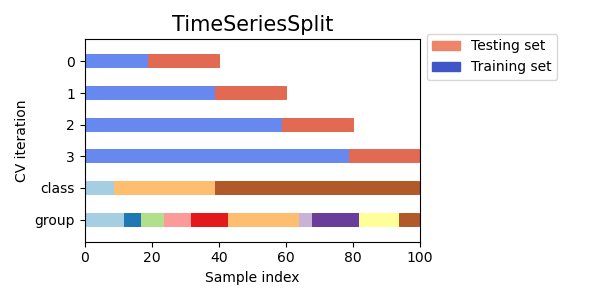

In [52]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5)
for i,(train, test) in enumerate(tscv.split(X)):
    print("%s %s" % (train, test))

[0] [1]
[0 1] [2]
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


# Случайные разбиения (Random subsampling)

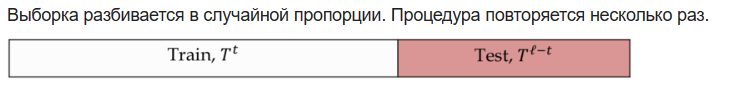

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.normal(mu, sigma, N_total*features_num).reshape((N_total, features_num))
y = np.random.randint(0, n_classes, size=N_total)
k = 10
for i in range(k):
    p = np.random.rand() * 0.5
    print("ITERATION NUMBER: ", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=p,
                                                    random_state=111)
    print(len(y_test))

ITERATION NUMBER:  0
493
ITERATION NUMBER:  1
473
ITERATION NUMBER:  2
417
ITERATION NUMBER:  3
369
ITERATION NUMBER:  4
181
ITERATION NUMBER:  5
33
ITERATION NUMBER:  6
231
ITERATION NUMBER:  7
357
ITERATION NUMBER:  8
21
ITERATION NUMBER:  9
181


# CROSS CORRELATION LINEAR REGRESSION EXAMPLE

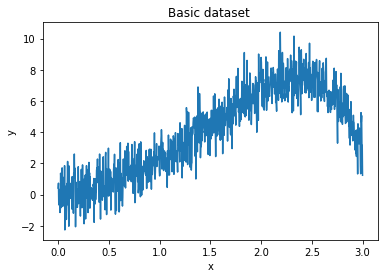

ITERATION NUMBER:  0


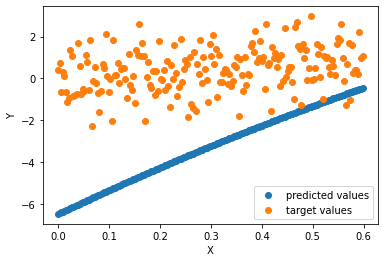

ITERATION NUMBER:  1


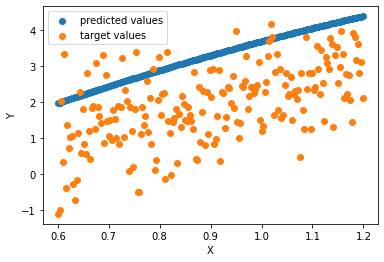

ITERATION NUMBER:  2


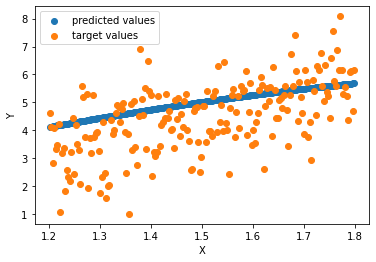

ITERATION NUMBER:  3


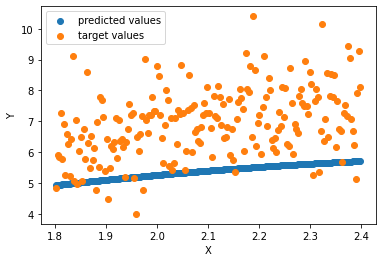

ITERATION NUMBER:  4


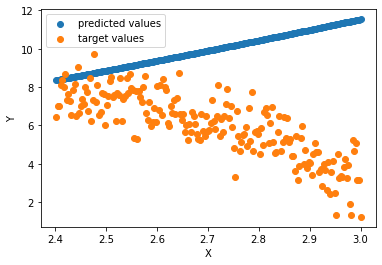

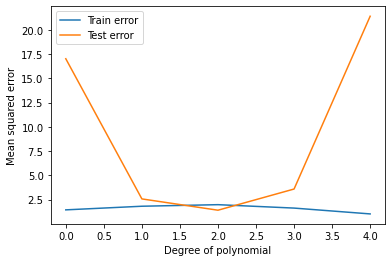

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures

N_total = 1000
features_num = 1
mu = 0.0
sigma = 1.0
n_classes = 5

mu_reg = 5.0
sigma_reg = 1.0

X = np.linspace(0.0001, 3.0, num=N_total)
y = np.exp(X)* np.sin(X) + np.random.normal(mu, sigma,N_total)

plt.plot(X, y)  
plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title('Basic dataset ') 
plt.show()

# regr = make_pipeline(StandardScaler(), LinearRegression())
regr = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, random_state=None, shuffle=False)

train_errors, test_errors = [],[]
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print("ITERATION NUMBER: ", i)
    
    X_train, X_test = X[train_index].reshape(-1,1), X[test_index].reshape(-1,1)
    y_train, y_test = y[train_index], y[test_index]
    
    regr.fit(X_train, y_train)
    
    y_pred_train = regr.predict(X_train)
    y_pred_test = regr.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test, y_pred_test))
    
    plt.scatter(X_test, y_pred_test, label='predicted values')
    plt.scatter(X_test, y_test, label='target values')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
plt.plot(range(num_folds), train_errors, label='Train error')
plt.plot(range(num_folds), test_errors, label='Test error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.show()

# вопрос: почему такой вид ошибки на тестовых данных?

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=111)
regr.fit(X_train.reshape(-1,1),y_train)
y_pred = regr.predict(X_test.reshape(-1,1))
mse_glob = mean_squared_error(y_test, y_pred)
print("GLOBAL MSE: ", mse_glob)

GLOBAL MSE:  2.344438059603409


# Nested k-Fold

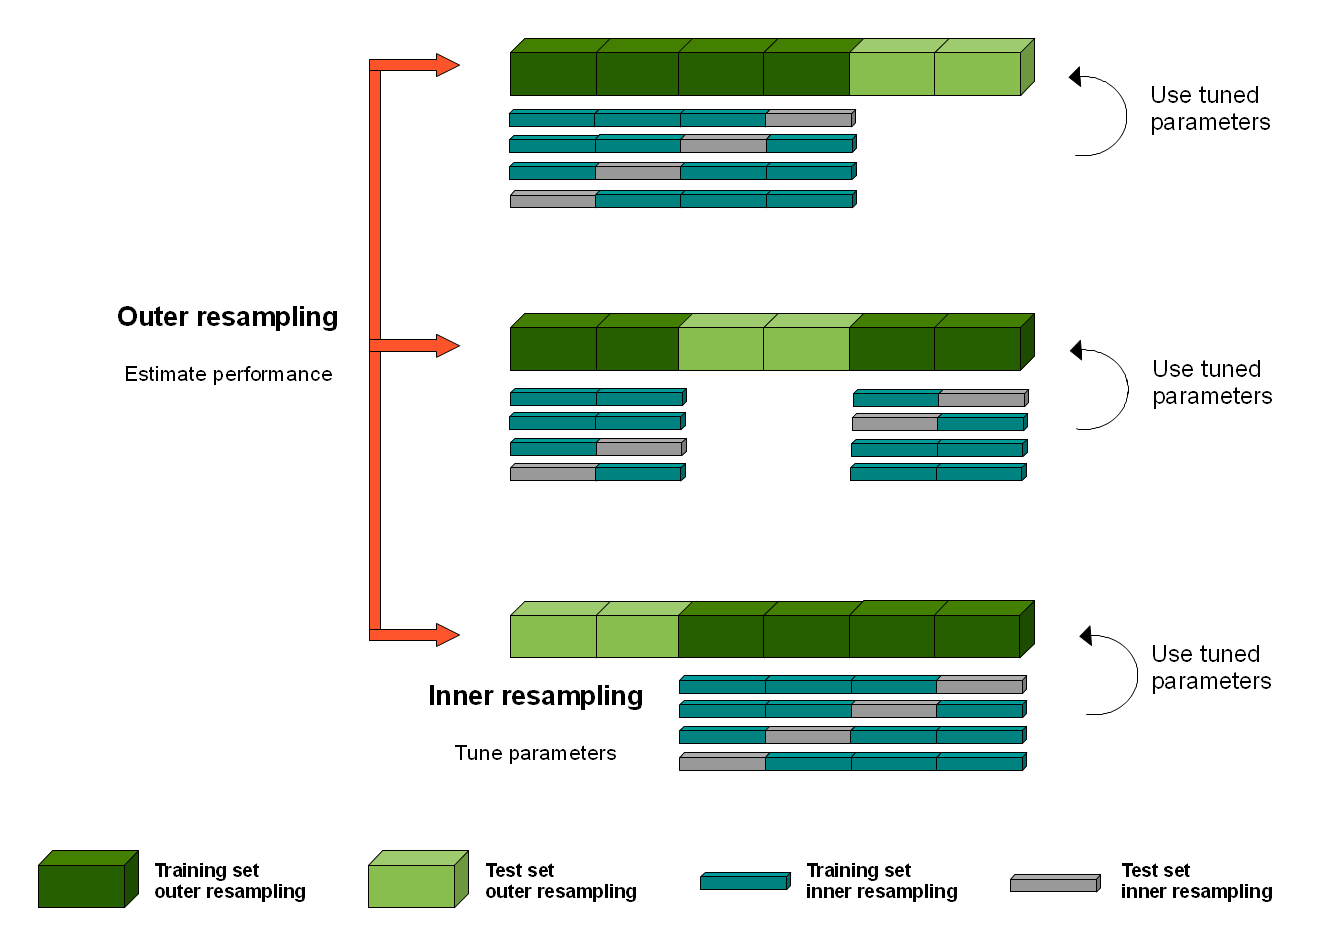

In [ ]:
#### Домашнее задание: 
#### задание для самостоятельной реализации по cross validation (nested k -fold)
#### сформулировать и решить задачу классификации на случайных данных при помощи SVC,
#### тренировку проводить и измерять качество модели c помощью nested k-folds
#### визуализировать ошибку и результаты предсказания

И др. Более подробно: https://scikit-learn.org/stable/modules/cross_validation.html